In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

In [2]:
data10 = np.loadtxt("MarcheAlex.txt")

In [3]:
data11 = np.loadtxt("CourseAlex.txt")

In [4]:
data = np.loadtxt("Marche.txt")

In [5]:
print(data)

[[ 1.000e-02 -1.100e+01 -8.000e+00]
 [ 5.000e-02 -9.000e+00 -1.000e+01]
 [ 9.000e-02 -9.000e+00 -1.000e+01]
 ...
 [ 2.729e+01 -1.300e+01 -4.300e+01]
 [ 2.733e+01 -5.000e+00 -8.100e+01]
 [ 2.737e+01 -1.800e+01 -7.800e+01]]


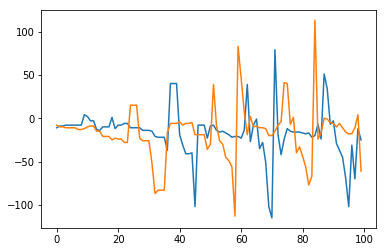

In [6]:
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()

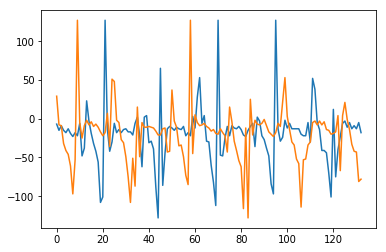

In [7]:
plt.plot(data[550:,1])
plt.plot(data[550:,2])
plt.show()

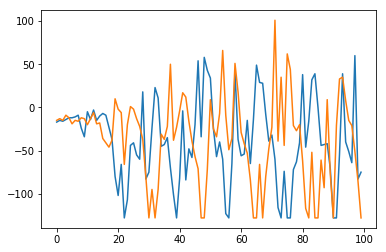

In [8]:
data2 = np.loadtxt("Course.txt")
plt.plot(data2[:100,1])
plt.plot(data2[:100,2])
plt.show()

In [9]:
####Fonction de lissage
def lissage(Ly,p):
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lyout=[]
    for i in range(p,Ly.shape[0]-p):
        val=0
        for k in range(2*p):
            val+=Ly[i-p+k]
        Lyout.append(val/2/p)
    Lyout.append(0)
    Lyout.append(0) 
    return Lyout

In [10]:
def lissage_2(data):
    liste = []
    liste.append(data[0])
    for i in range(1,data.shape[0]-1):
        if (data[i+1]-data[i-1]>0 and data[i+1]-data[i]>0) or (data[i+1]-data[i-1]<0 and data[i+1]-data[i]<0):
            liste.append(data[i])
        else:
            liste.append((data[i+1]+data[i-1])/2)
    
    liste.append(data[data.shape[0]-1])
    buff = np.array(liste)
    return buff

In [11]:
def delta_data(data):
    liste = []
    for i in range(1,data.shape[0]):
        if data[i]-data[i-1]>0 and data[i]>0:
            liste.append(1)
        elif data[i]-data[i-1]<0 and data[i]>0:
            liste.append(-1)
        elif data[i]-data[i-1]>0 and data[i]<0:
            liste.append(2)
        elif data[i]-data[i-1]<0 and data[i]<0:
            liste.append(-2)
        else:
            liste.append(0)
    liste.append(0)
    buff = np.array(liste)
    return buff

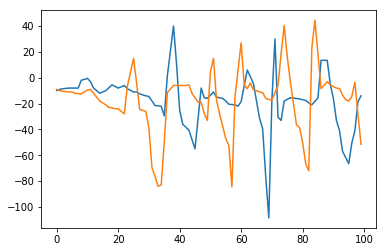

[[ 1.000e-02 -1.000e+01 -9.000e+00]
 [ 5.000e-02 -9.000e+00 -1.000e+01]
 [ 9.000e-02 -8.500e+00 -1.050e+01]
 ...
 [ 2.729e+01 -9.000e+00 -6.200e+01]
 [ 2.733e+01 -4.500e+00 -3.100e+01]
 [ 2.737e+01  0.000e+00  0.000e+00]]


In [12]:
buff = data[:,1]
buff = lissage(buff,1)
data[:,1]=lissage_2(np.array(buff))
buff = data[:,2]
buff = lissage(buff,1)
data[:,2]=lissage_2(np.array(buff))
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()
print(data)

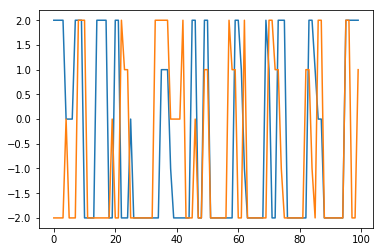

In [13]:
data[:,1]=delta_data(data[:,1])
data[:,2]=delta_data(data[:,2])
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()

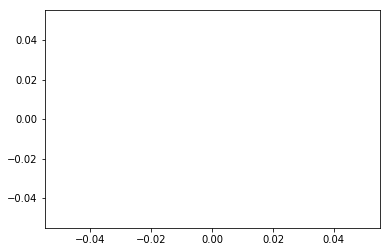

[[ 0.02  2.    0.  ]
 [ 0.06  2.    2.  ]
 [ 0.1   2.    2.  ]
 [ 0.14  2.   -2.  ]
 [ 0.18  2.    0.  ]
 [ 0.22  2.    0.  ]
 [ 0.26 -2.    2.  ]
 [ 0.3  -2.    2.  ]
 [ 0.34 -2.   -2.  ]
 [ 0.38  2.   -2.  ]
 [ 0.42  2.    2.  ]
 [ 0.46  2.    2.  ]
 [ 0.5  -2.   -2.  ]
 [ 0.54  2.   -2.  ]
 [ 0.58  2.   -2.  ]
 [ 0.62 -2.   -2.  ]
 [ 0.66 -2.   -2.  ]
 [ 0.7  -2.    2.  ]
 [ 0.74 -2.    2.  ]
 [ 0.78 -2.    2.  ]
 [ 0.82 -2.   -2.  ]
 [ 0.86 -2.   -2.  ]
 [ 0.9   2.    2.  ]
 [ 0.94  2.    2.  ]
 [ 0.98  2.    2.  ]
 [ 1.02 -2.   -2.  ]
 [ 1.06  2.   -2.  ]
 [ 1.1   2.   -2.  ]
 [ 1.14 -2.   -2.  ]
 [ 1.18 -2.   -2.  ]
 [ 1.22  2.   -2.  ]
 [ 1.26  1.    0.  ]
 [ 1.3  -2.    2.  ]
 [ 1.34 -2.    2.  ]
 [ 1.38 -2.    2.  ]
 [ 1.42 -2.    2.  ]
 [ 1.46 -2.    1.  ]
 [ 1.5  -2.   -2.  ]
 [ 1.54 -2.   -2.  ]
 [ 1.58  2.    1.  ]
 [ 1.62  2.    1.  ]
 [ 1.66 -2.   -2.  ]
 [ 1.7  -2.   -2.  ]
 [ 1.74  2.   -2.  ]
 [ 1.78  2.   -2.  ]
 [ 1.82  1.   -2.  ]
 [ 1.86 -1.   -2.  ]
 [ 1.9   1.  

In [14]:
buff = data2[:,1]
buff = lissage(buff,1)
data2[:,1]=delta_data(lissage_2(np.array(buff)))
buff = data2[:,2]
buff = lissage(buff,1)
data2[:,2]=delta_data(lissage_2(np.array(buff)))
plt.plot(data2[550:,1])
plt.plot(data2[550:,2])
plt.show()
print(data2)

In [15]:
buff = data10[:,0]
buff = lissage(buff,1)
data10[:,0]=delta_data(lissage_2(np.array(buff)))
buff = data10[:,1]
buff = lissage(buff,1)
data10[:,1]=delta_data(lissage_2(np.array(buff)))
buff = data11[:,0]
buff = lissage(buff,1)
data11[:,0]=delta_data(lissage_2(np.array(buff)))
buff = data11[:,1]
buff = lissage(buff,1)
data11[:,1]=delta_data(lissage_2(np.array(buff)))

In [16]:
def transform_data(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data3 = np.zeros((size), dtype='i')
    data5 = np.zeros((2*size+1), dtype='i')
    
    for i in range(data.shape[0]):
        if data[i,x] == 1 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,x] == -2 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,y] == 1 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,y] == -2 and var1 == 0 and var3 == 0 and var2 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var3 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var4 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
        
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

In [17]:
def compute_data_2(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    
    for i in range(data.shape[0]-1):
        if data[i,x]<0 and data[i+1,x]-data[i,x]<0 and var2 == 0:
            var1 = 1
        if data[i,x]>0 and data[i+1,x]-data[i,x]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]>0:
                var5 = 1

            if data[i,x]>0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]<0 and var3 == 1:
                var4 = 1

            if data[i,x]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]<0:
                var5 = 1

            if data[i,x]<0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]>0 and var3 == 1:
                var4 = 1

            if data[i,x]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    for i in range(data.shape[0]-1):
        if data[i,y]<0 and data[i+1,y]-data[i,y]<0 and var2 == 0:
            var1 = 1
        if data[i,y]>0 and data[i+1,y]-data[i,y]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]>0:
                var5 = 1

            if data[i,y]>0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]<0 and var3 == 1:
                var4 = 1

            if data[i,y]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]<0:
                var5 = 1

            if data[i,y]<0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]>0 and var3 == 1:
                var4 = 1

            if data[i,y]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [18]:
def compute_data(data,liste,num):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    var7 = 0
    var8 = 0
    j = 0
    data4 = np.zeros((50), dtype='i')
    data3 = np.zeros((50), dtype='i')
    data5 = np.zeros((101), dtype='i')
    time = np.zeros((50), dtype='f')
    for i in range(data.shape[0]):
        if data[i,1]>25 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,1]<-25 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,2]<-25 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,2]>25 and var2 == 0 and var3 == 0 and var1 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]>25:
                var5 = 1

            if data[i,2]<-20 and var5 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var5 = 0
                var1 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var2 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]<-25:
                var6 = 1

            if data[i,2]>20 and var6 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var6 = 0
                var2 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var3 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]<-25:
                var7 = 1

            if data[i,1]>20 and var7 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var7 = 0
                var3 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var4 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]>25:
                var8 = 1

            if data[i,1]<-20 and var8 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var8 = 0
                var4 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)


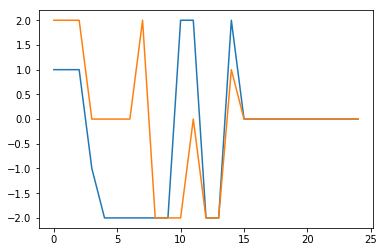

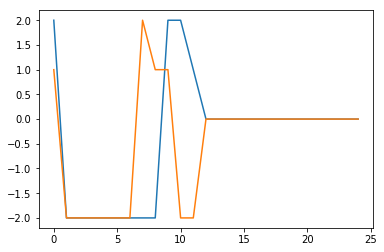

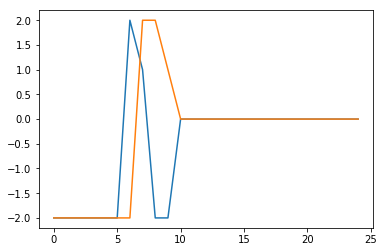

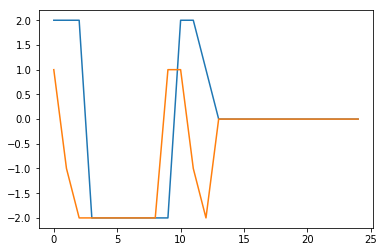

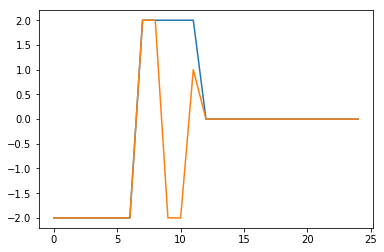

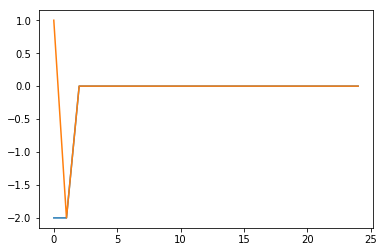

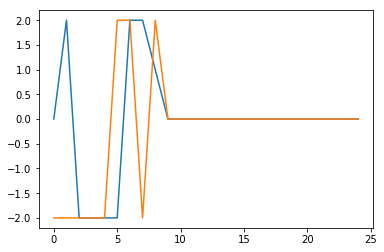

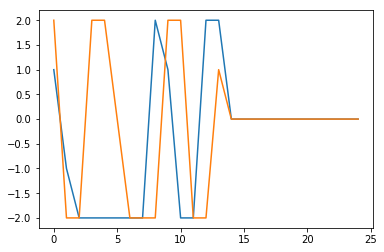

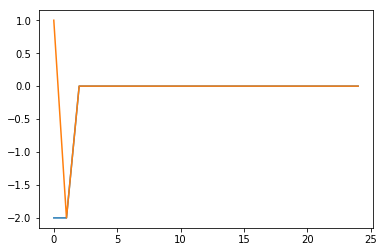

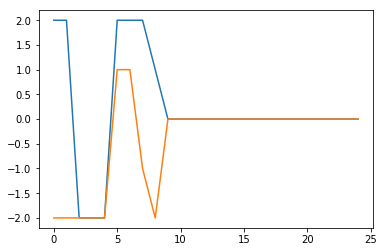

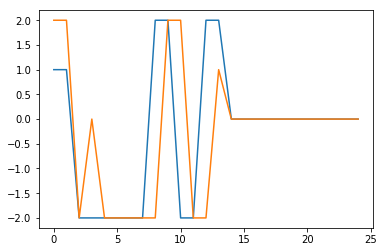

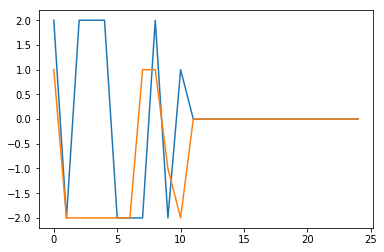

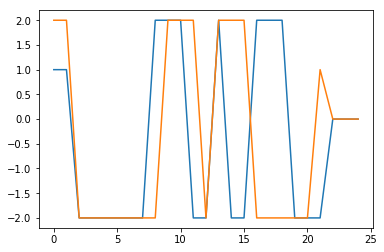

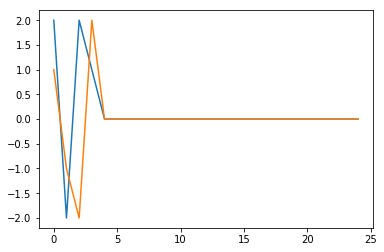

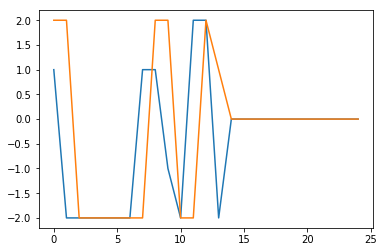

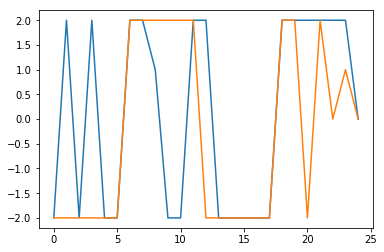

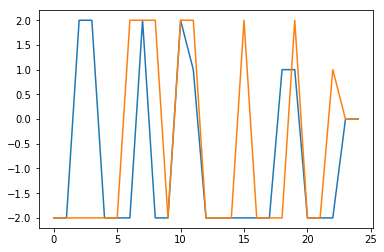

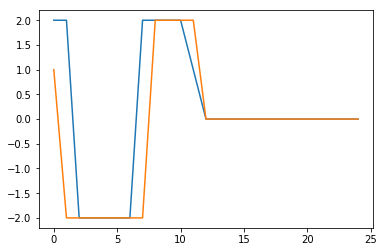

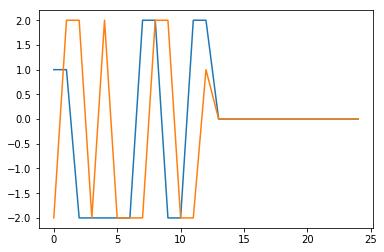

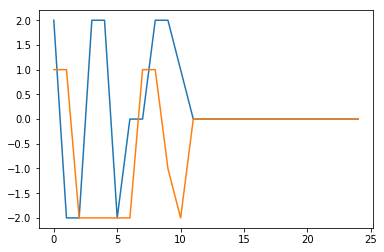

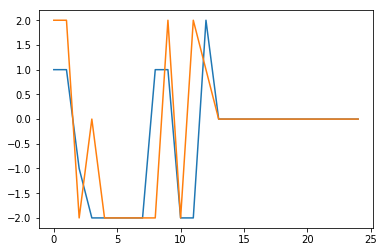

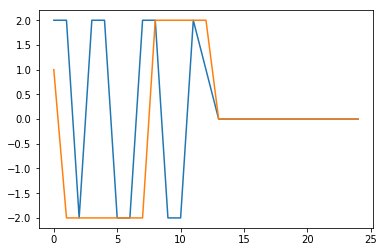

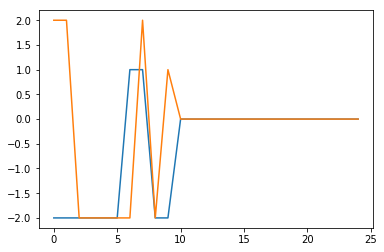

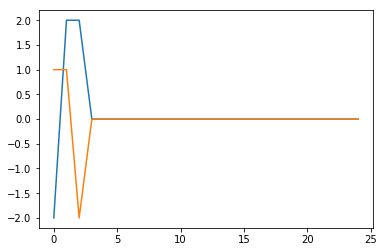

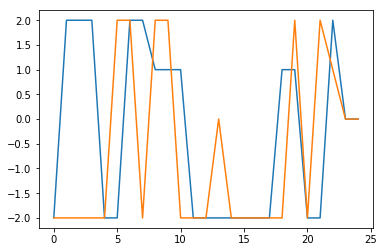

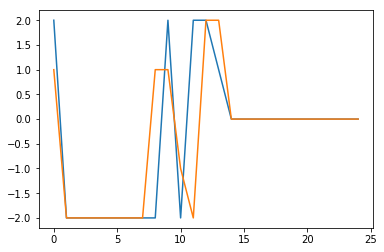

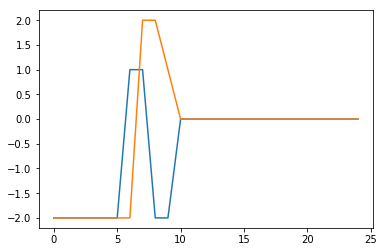

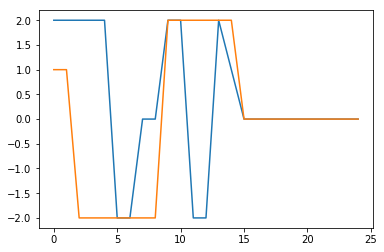

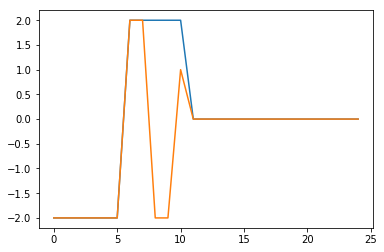

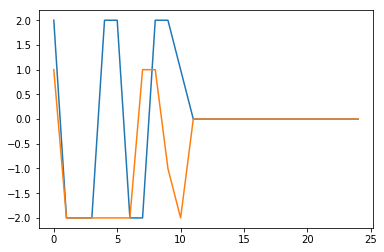

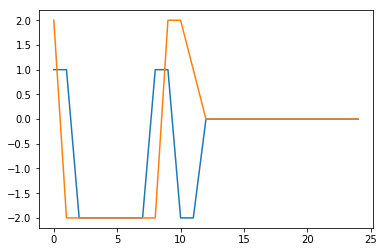

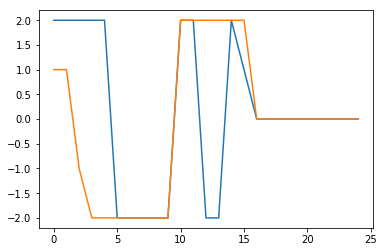

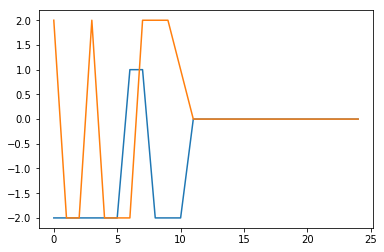

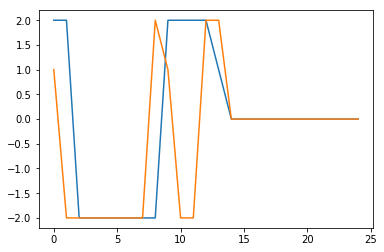

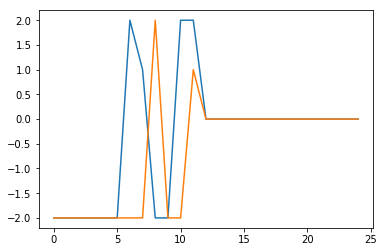

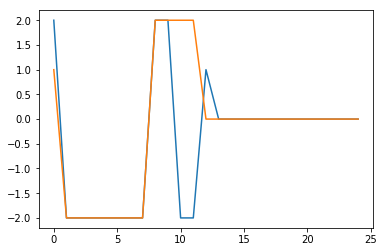

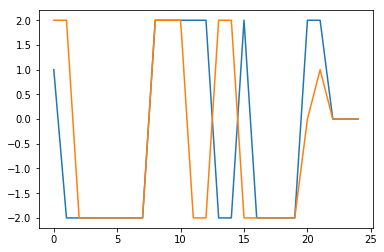

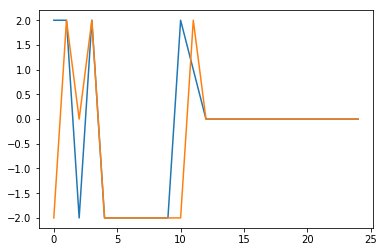

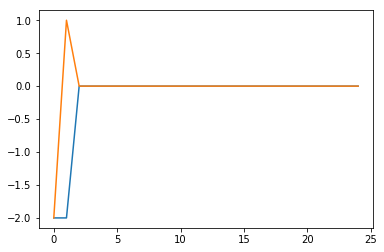

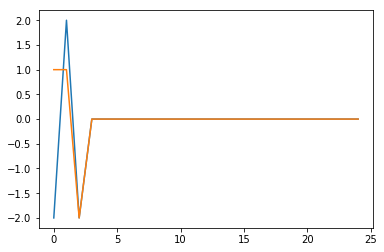

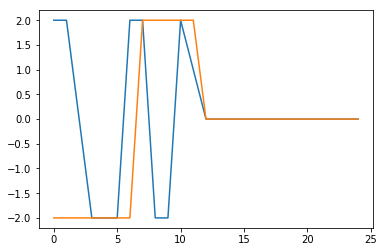

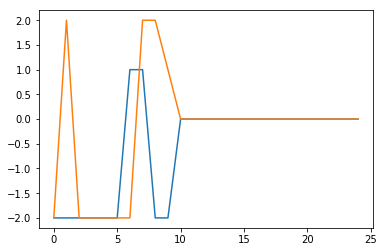

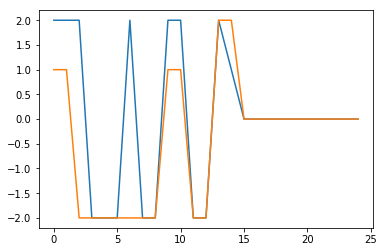

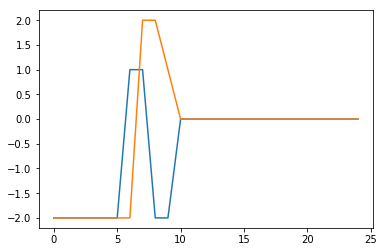

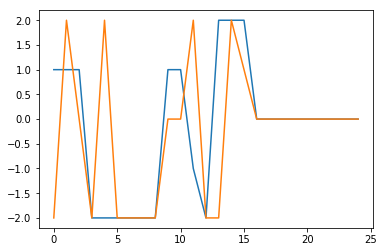

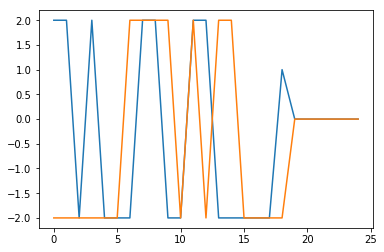

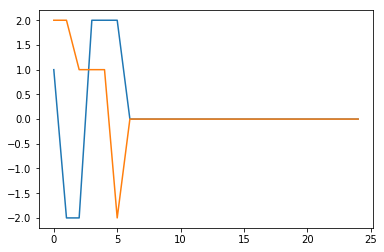

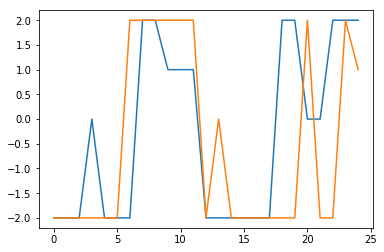

In [19]:
liste = []
transform_data(data,liste,1,2,35)

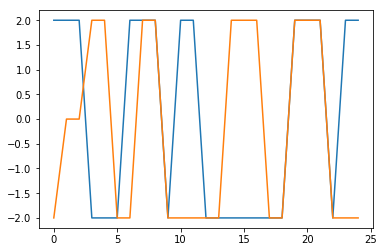

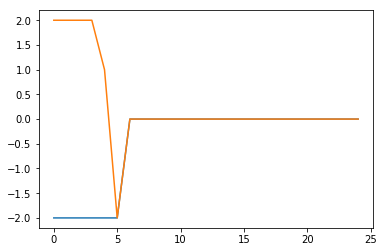

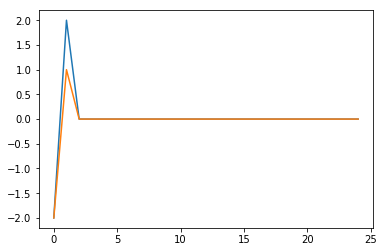

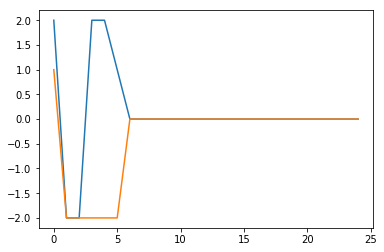

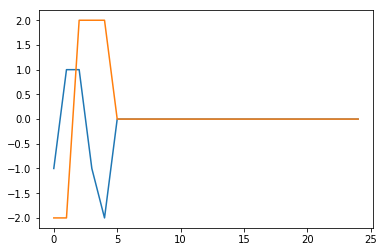

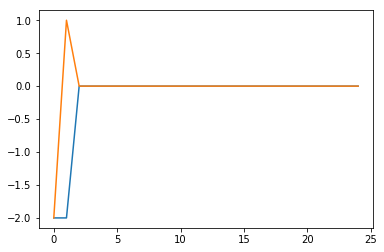

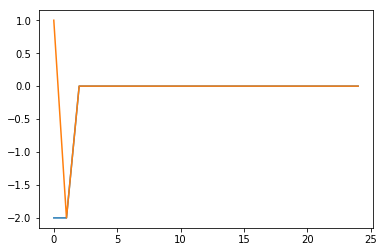

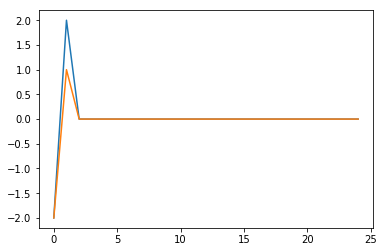

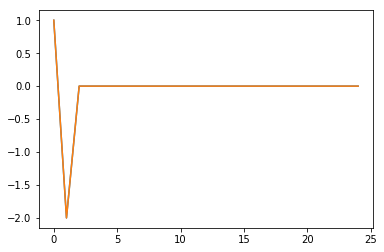

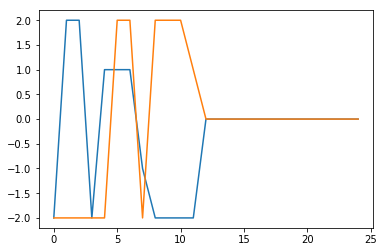

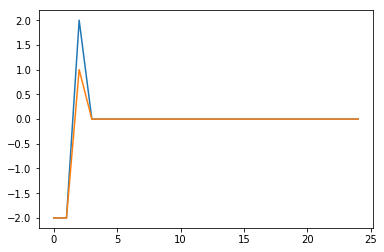

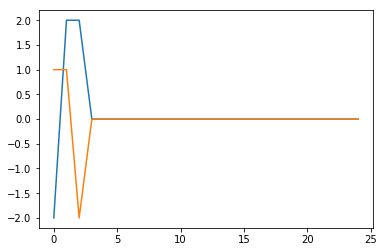

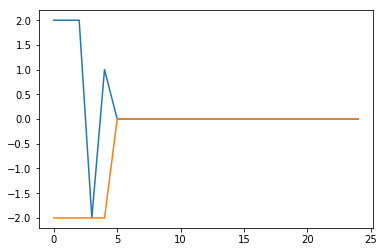

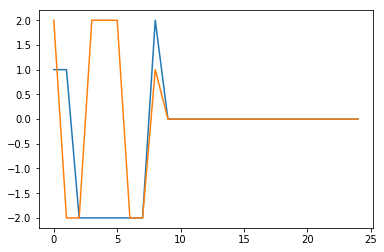

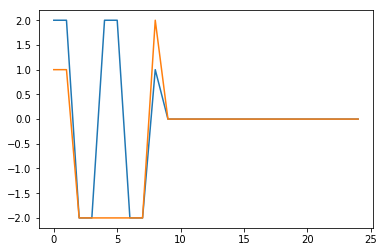

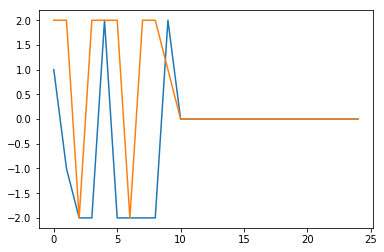

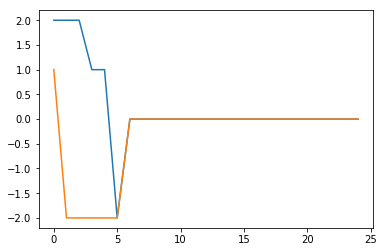

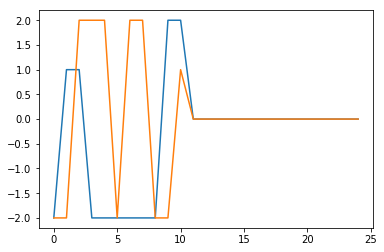

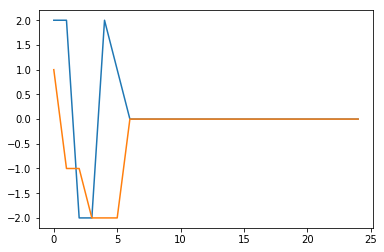

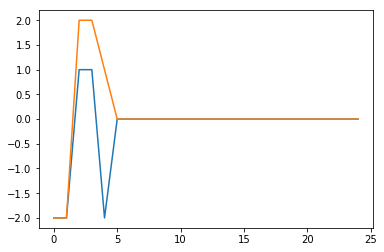

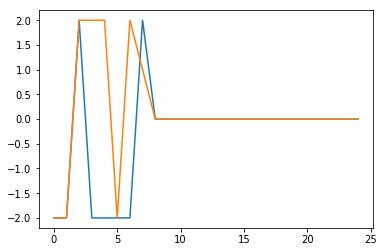

In [20]:
transform_data(data2,liste,1,2,35)

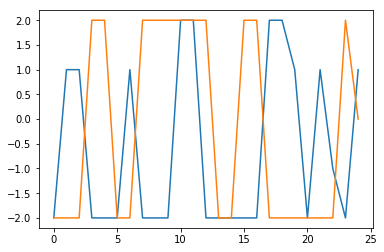

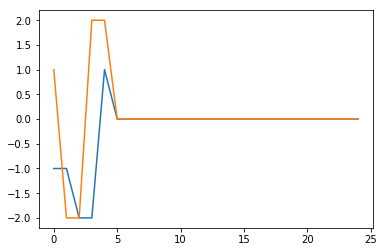

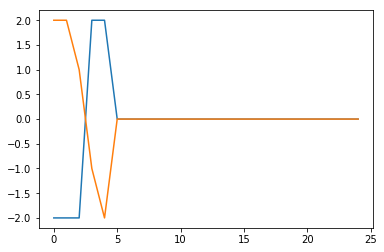

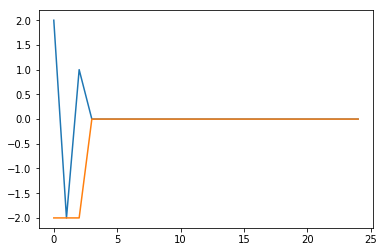

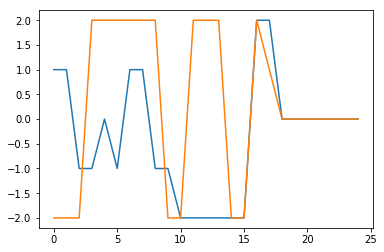

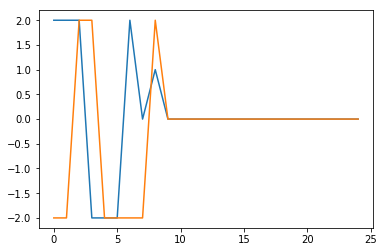

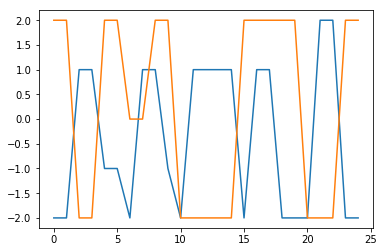

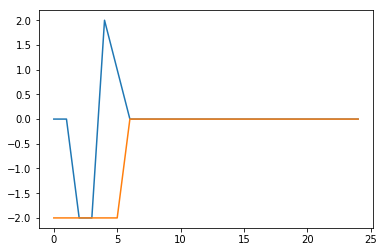

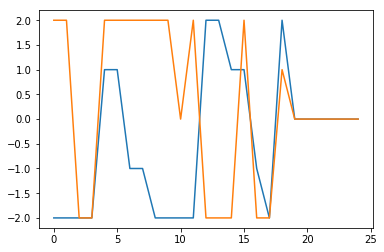

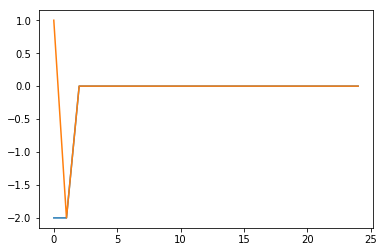

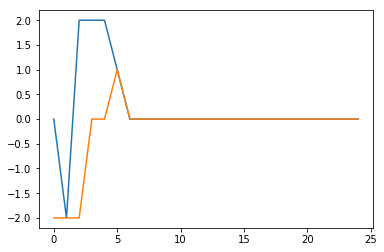

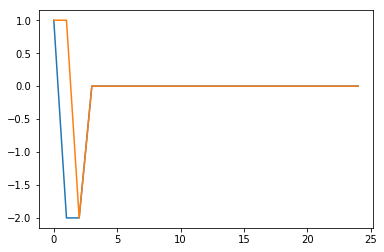

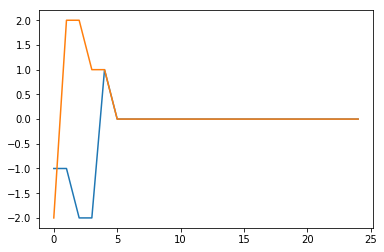

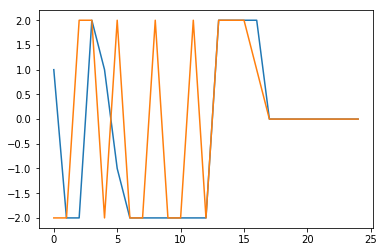

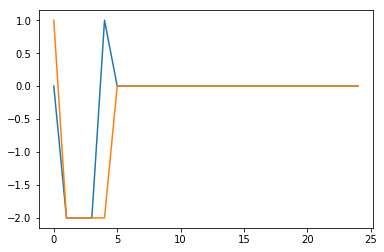

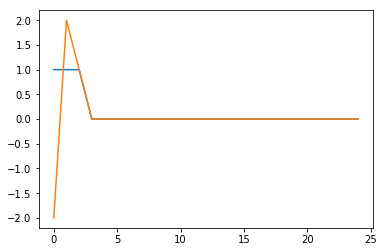

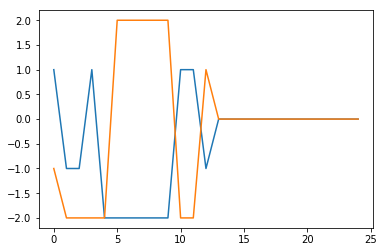

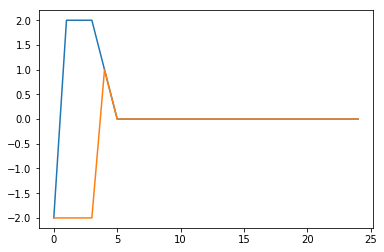

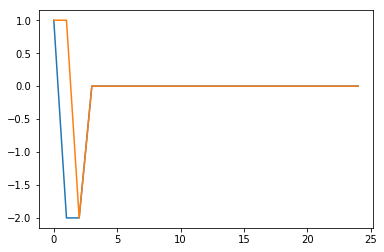

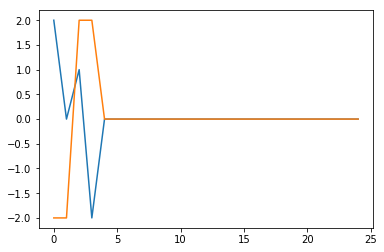

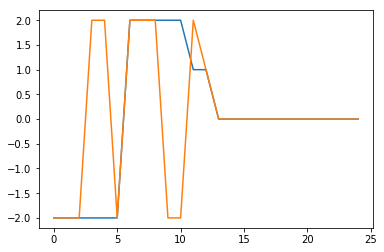

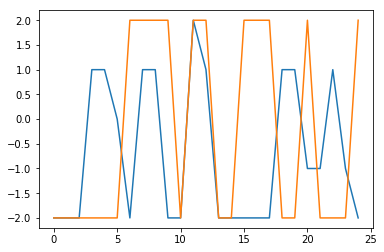

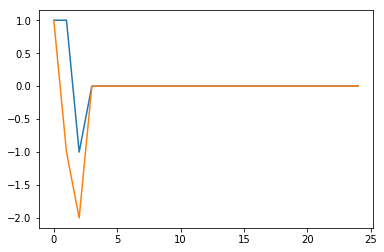

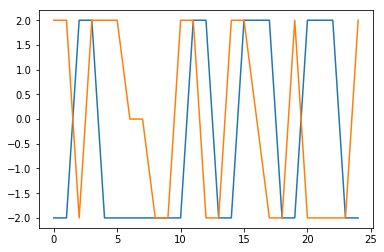

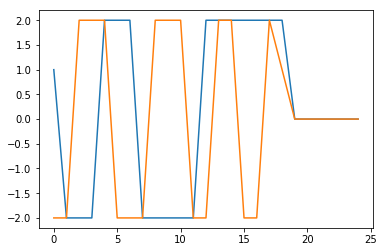

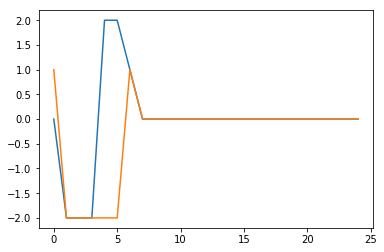

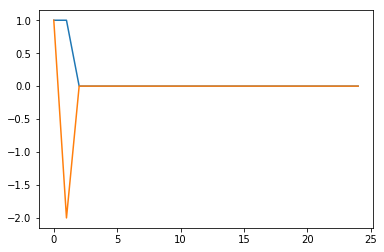

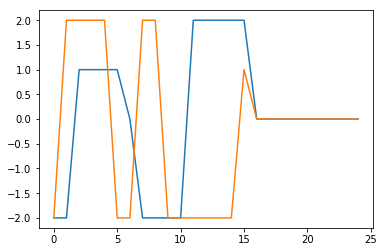

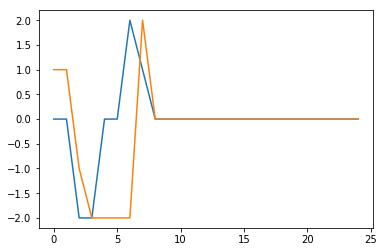

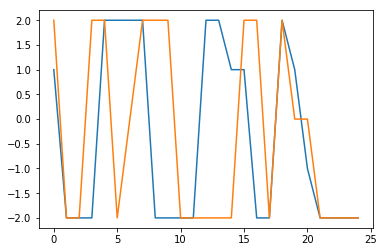

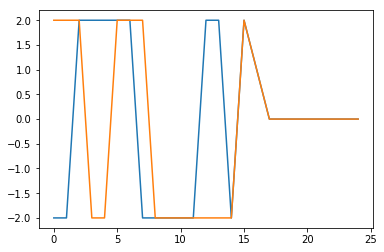

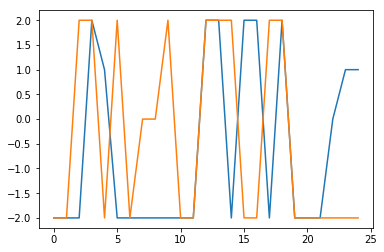

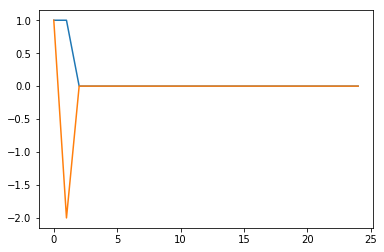

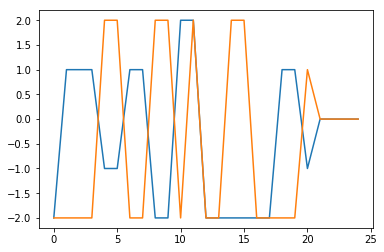

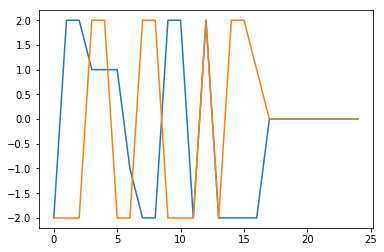

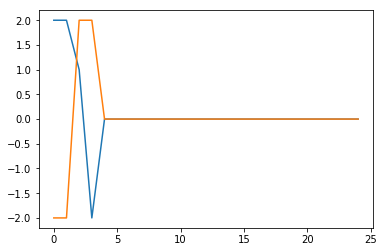

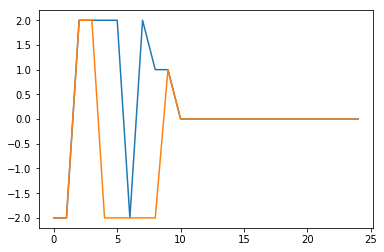

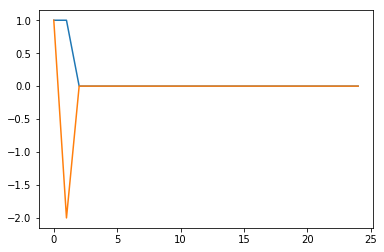

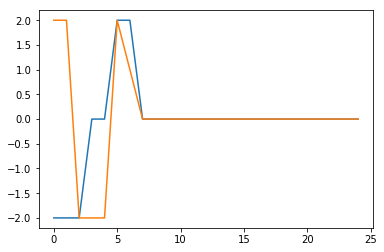

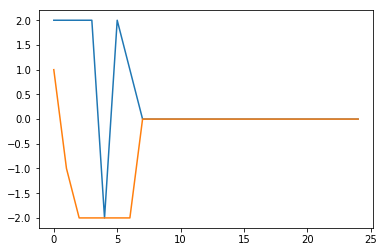

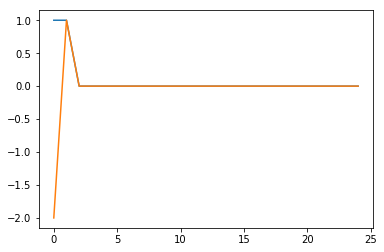

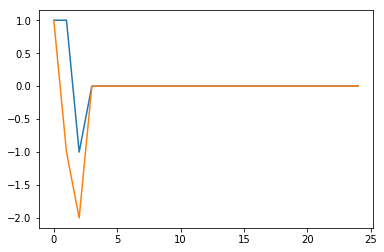

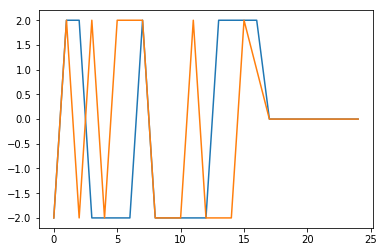

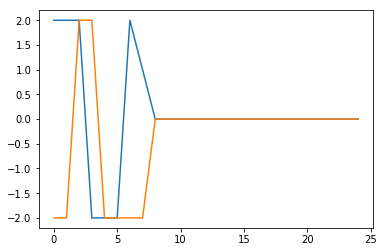

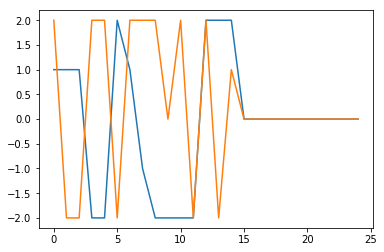

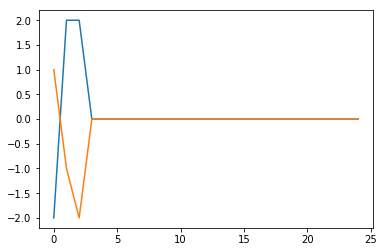

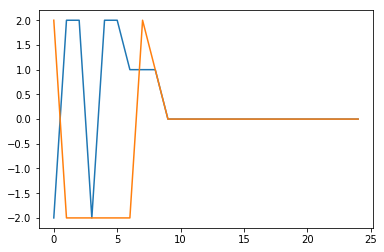

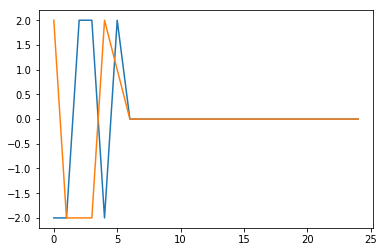

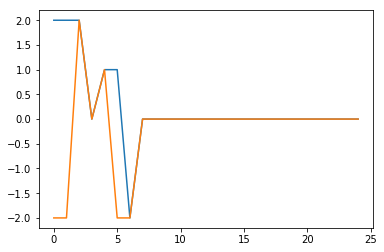

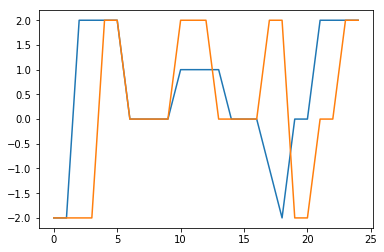

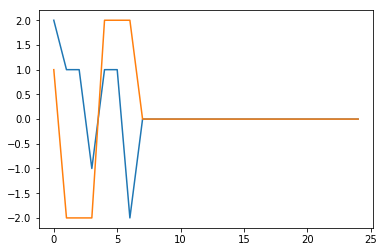

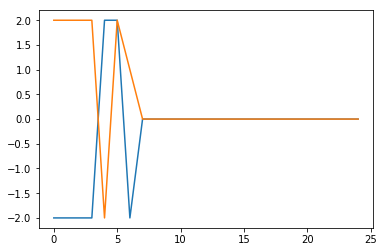

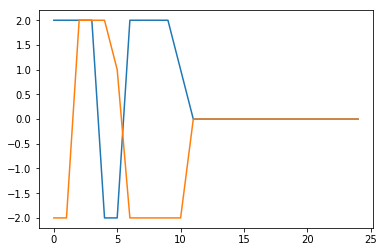

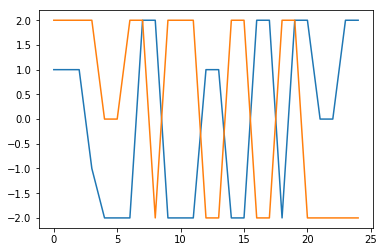

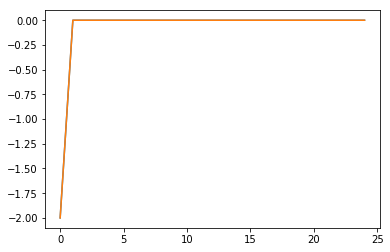

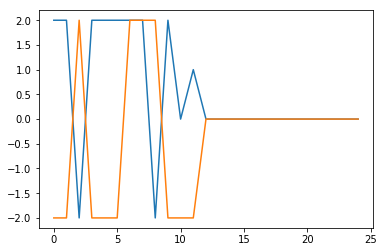

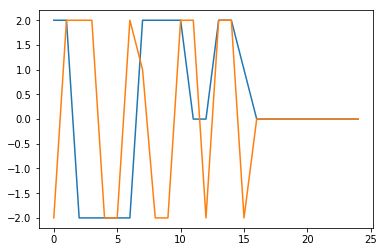

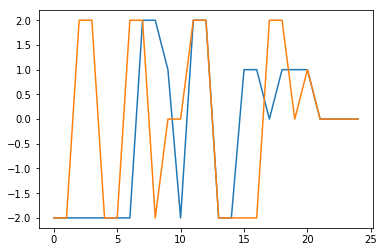

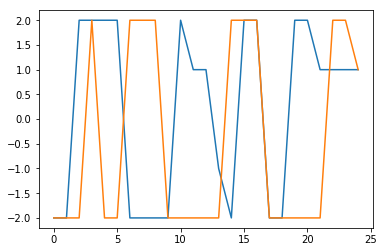

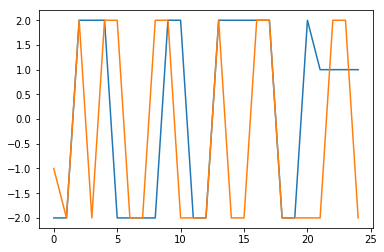

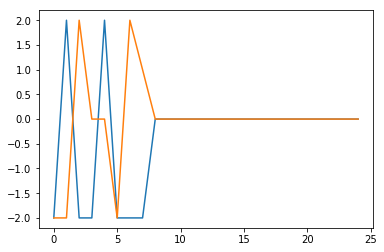

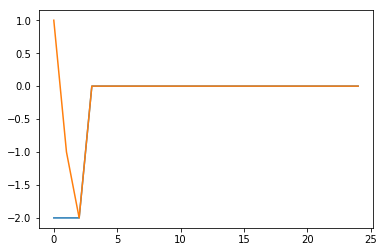

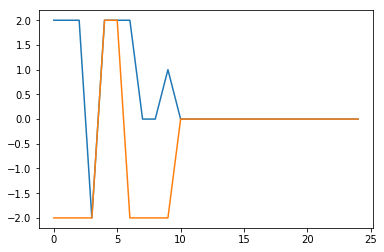

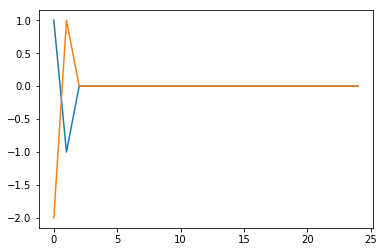

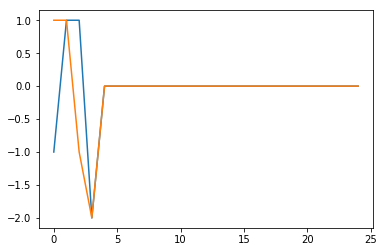

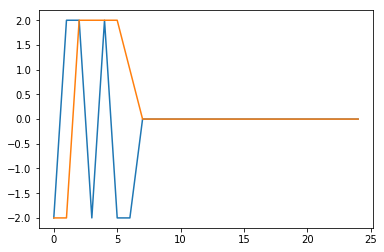

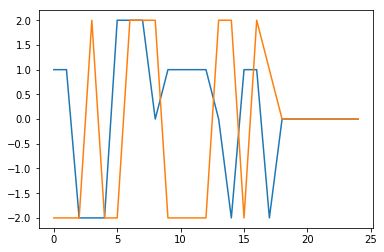

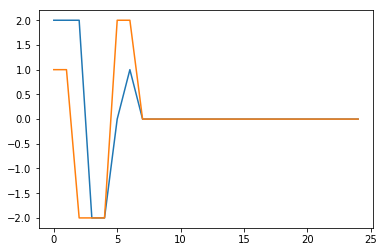

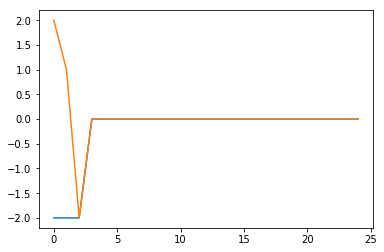

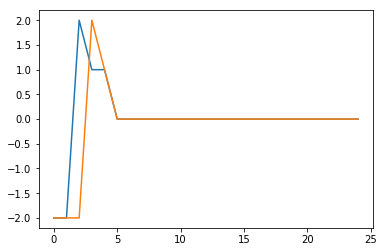

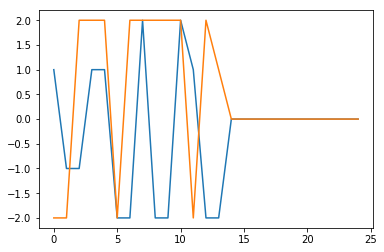

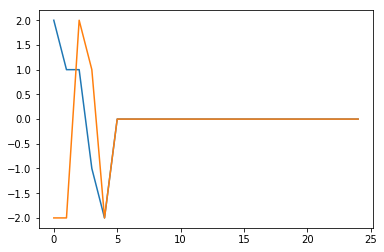

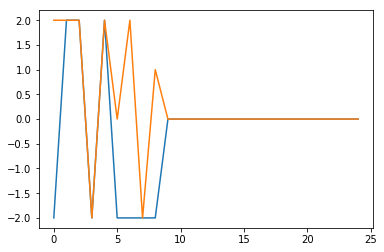

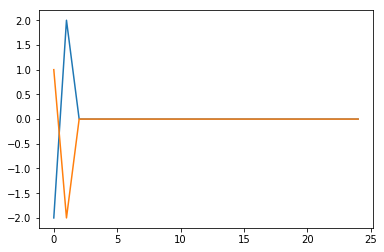

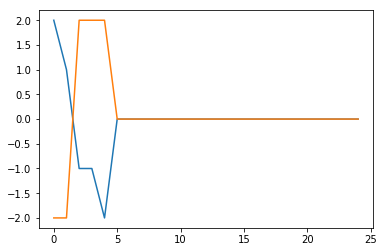

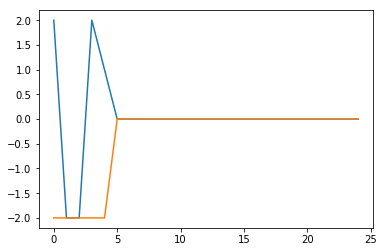

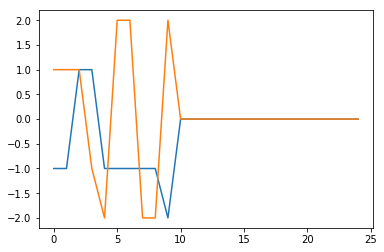

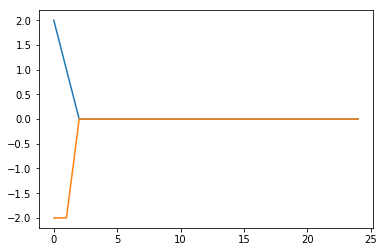

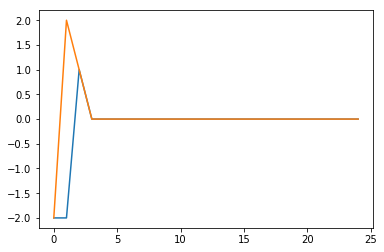

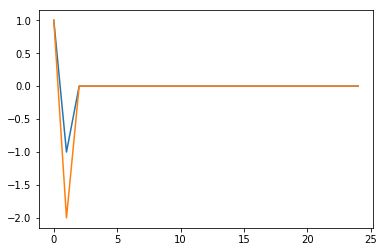

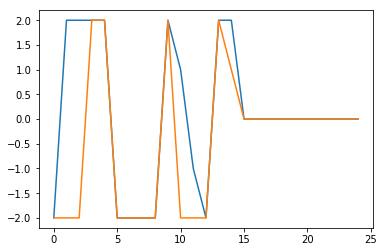

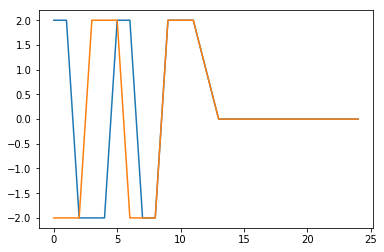

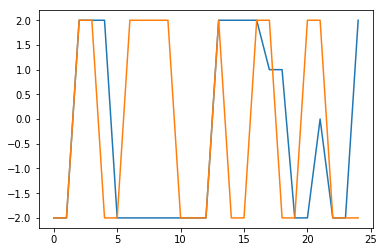

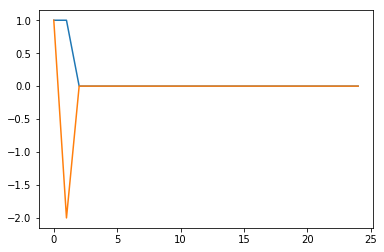

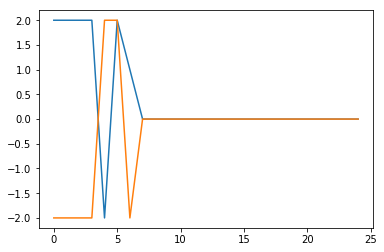

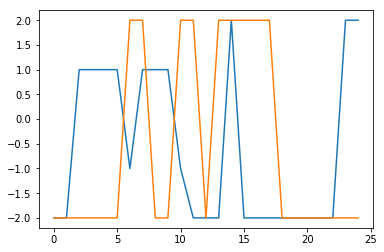

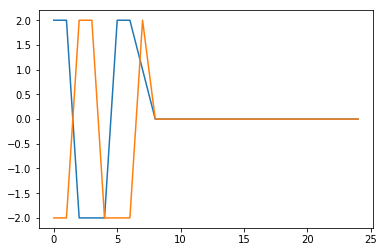

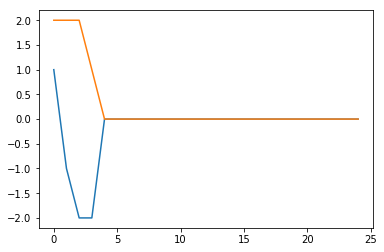

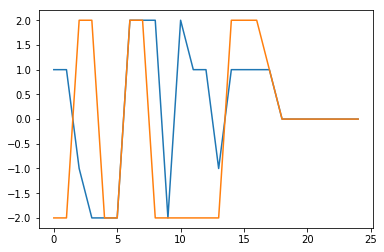

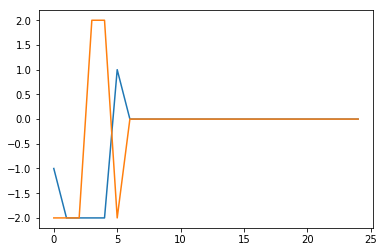

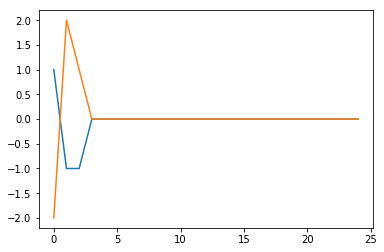

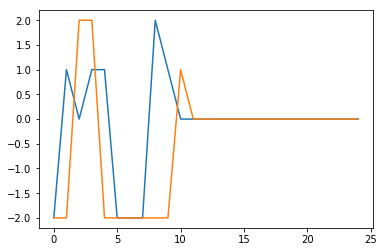

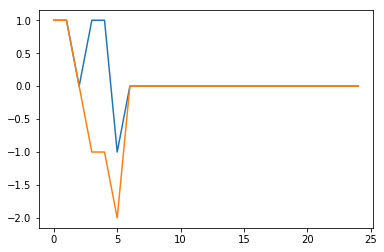

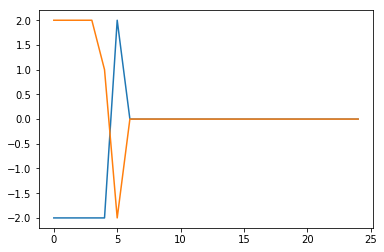

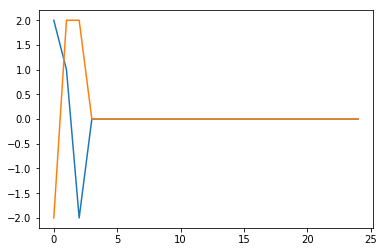

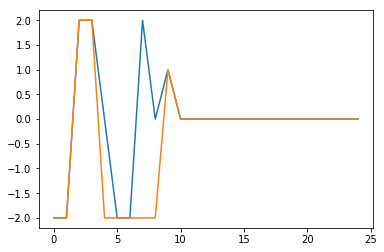

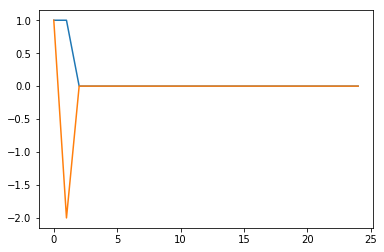

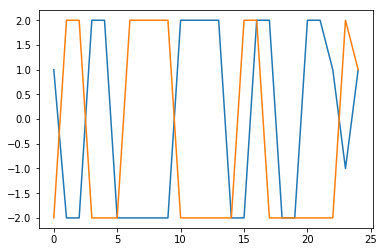

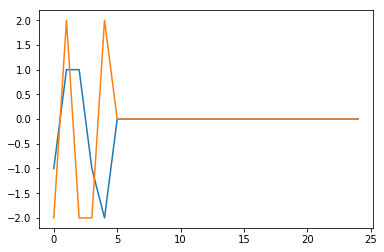

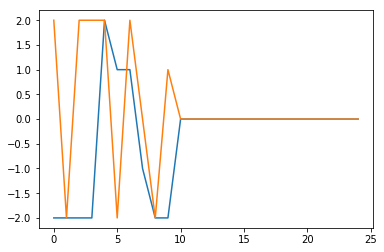

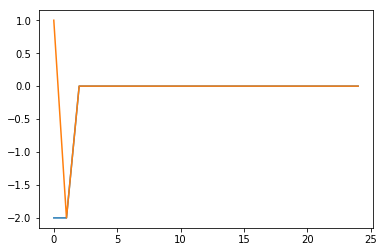

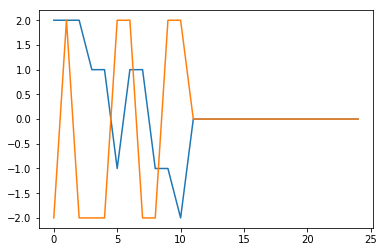

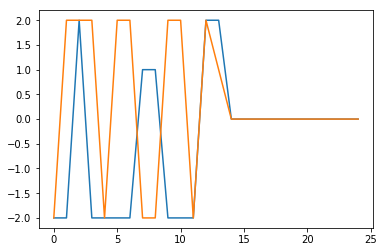

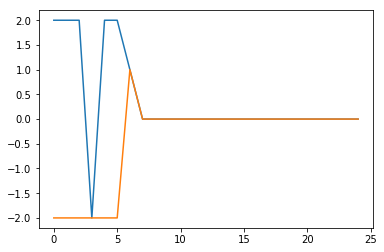

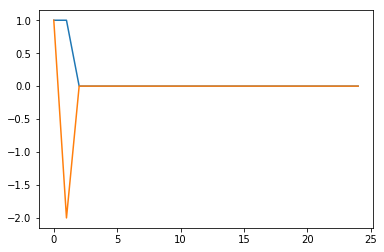

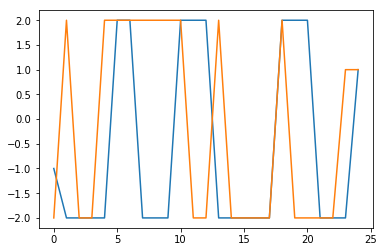

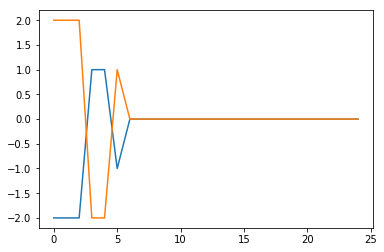

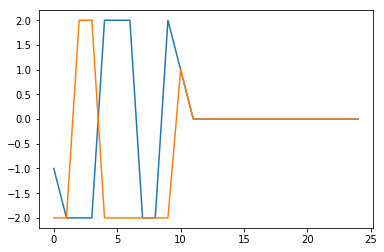

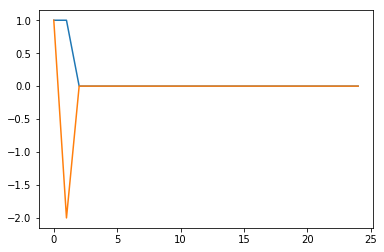

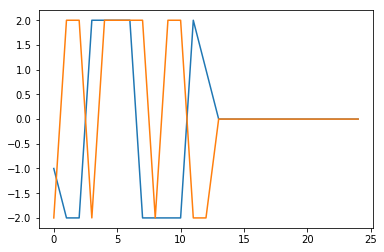

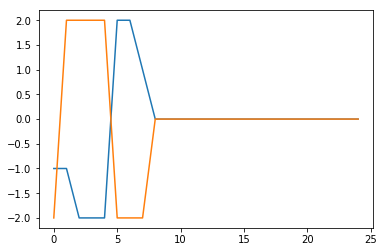

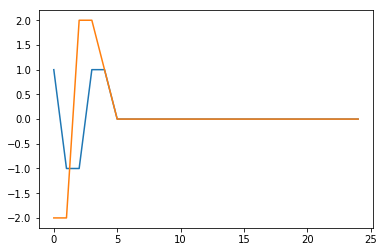

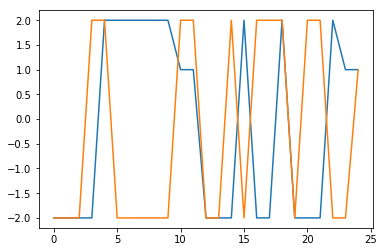

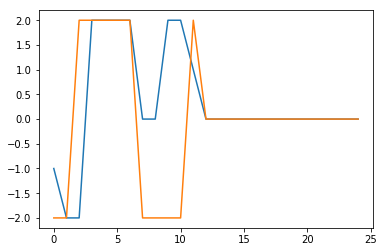

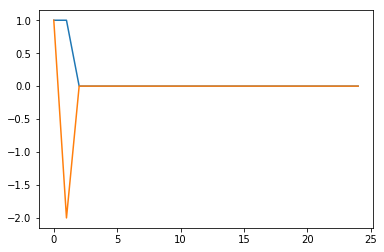

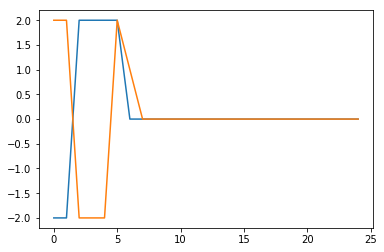

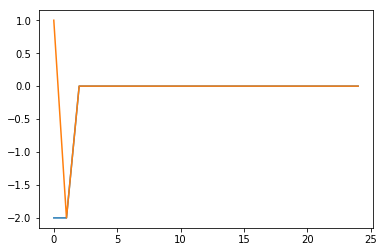

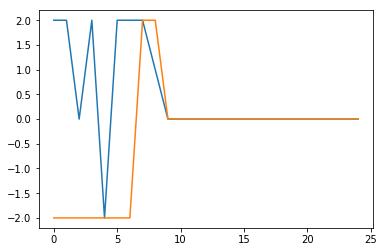

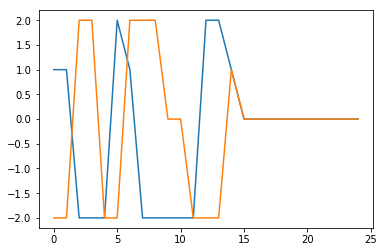

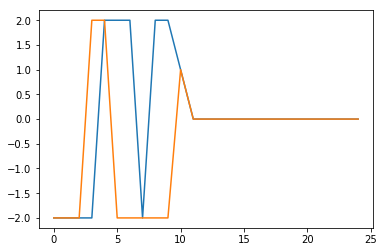

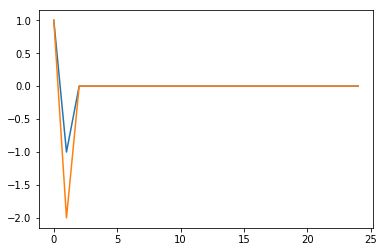

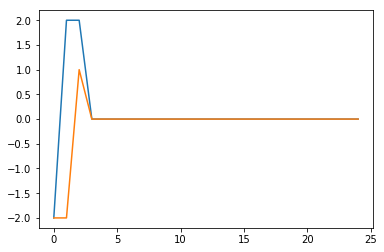

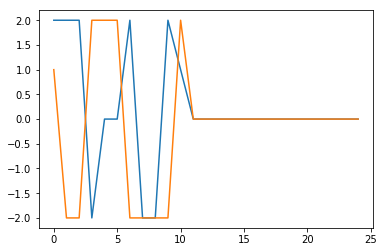

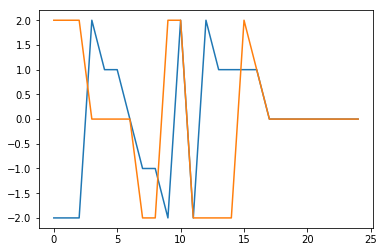

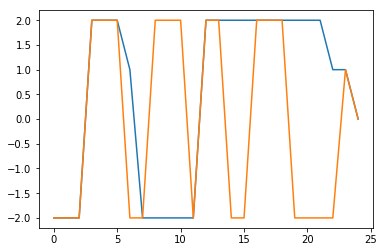

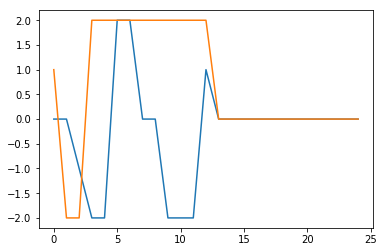

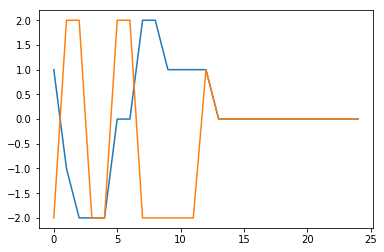

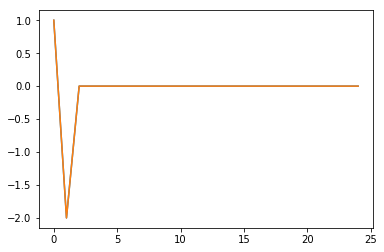

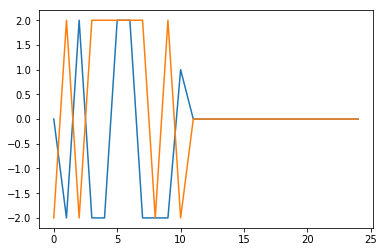

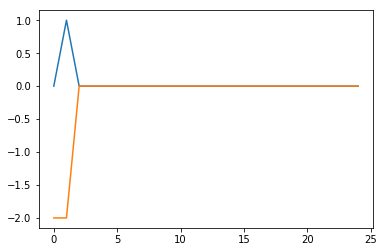

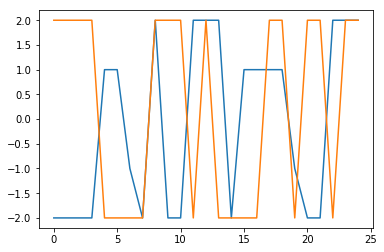

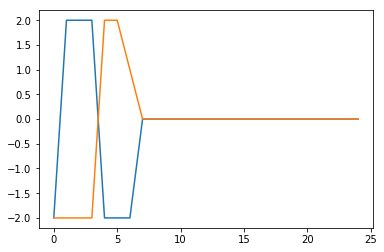

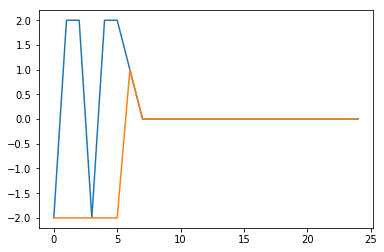

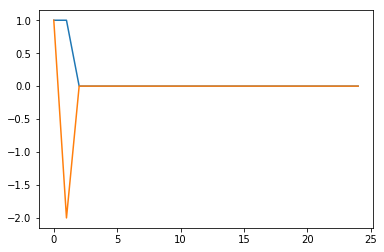

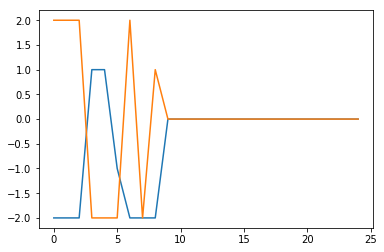

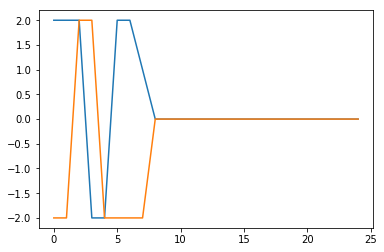

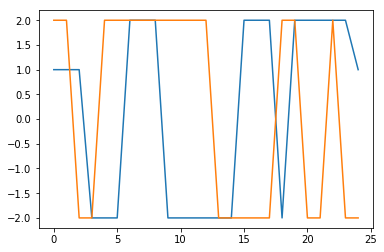

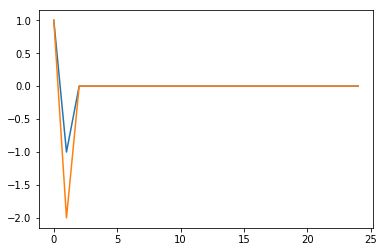

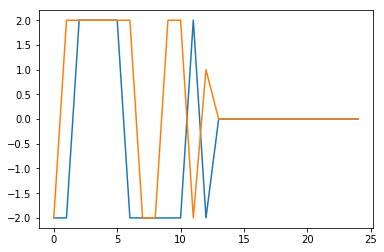

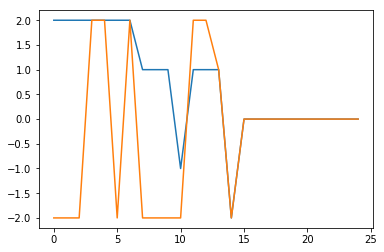

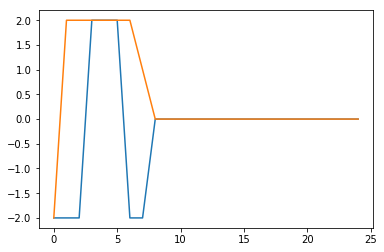

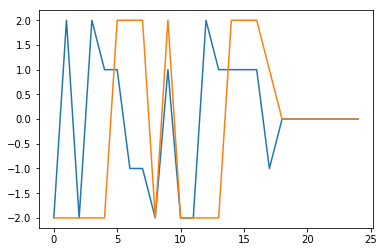

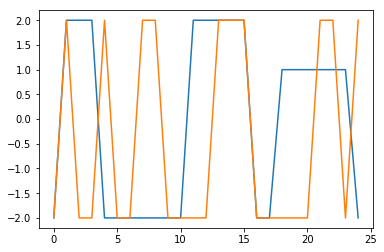

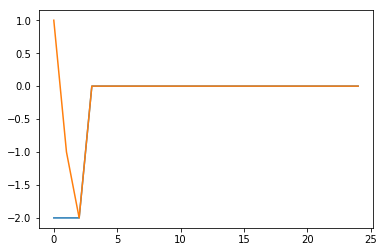

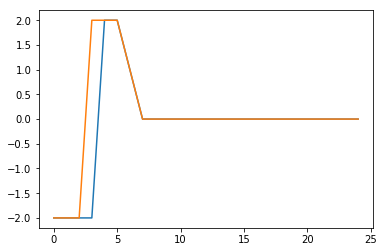

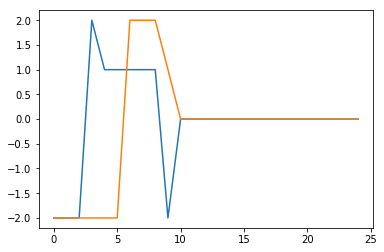

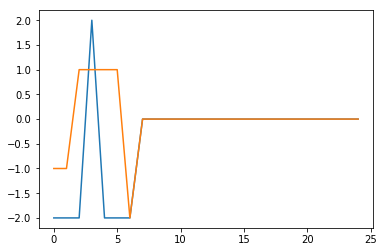

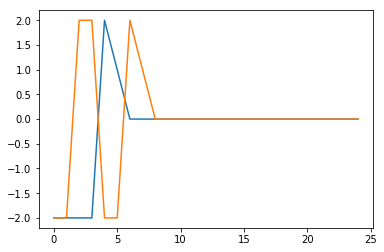

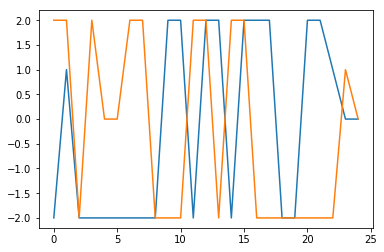

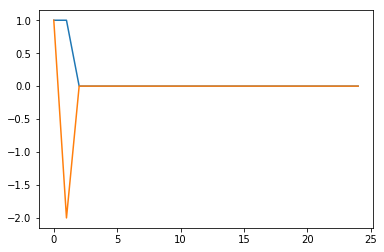

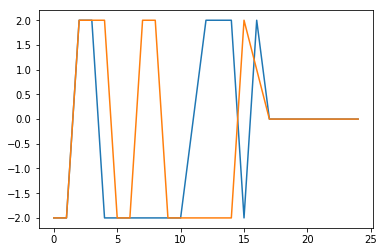

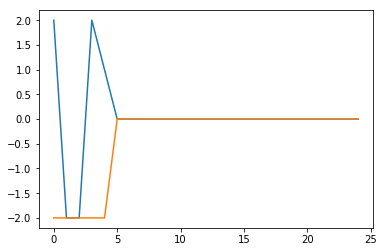

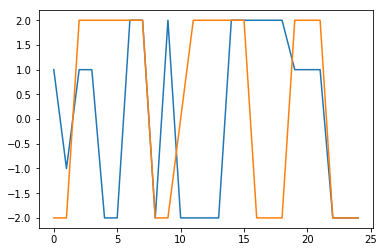

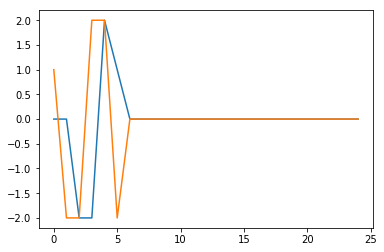

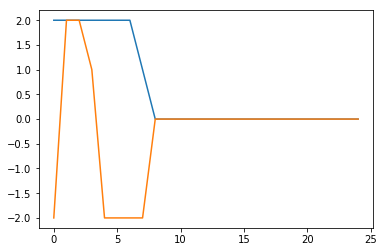

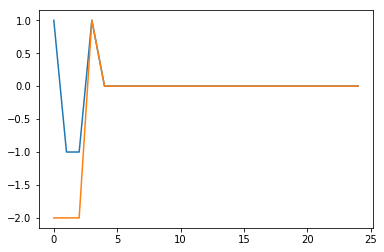

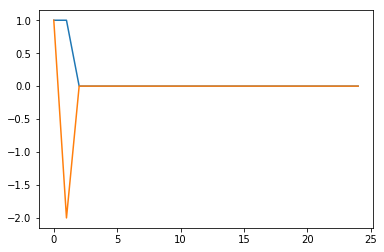

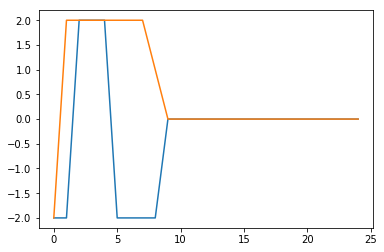

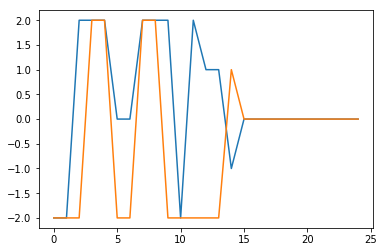

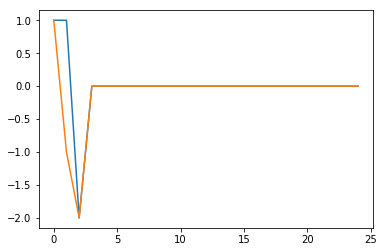

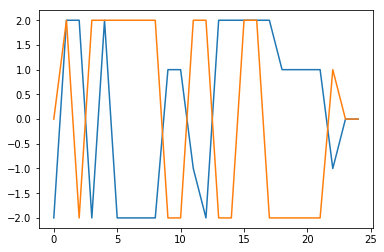

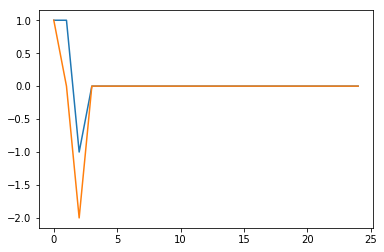

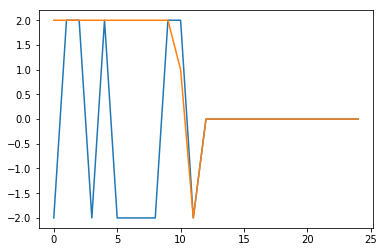

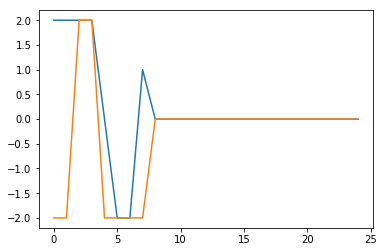

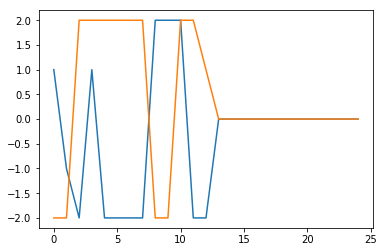

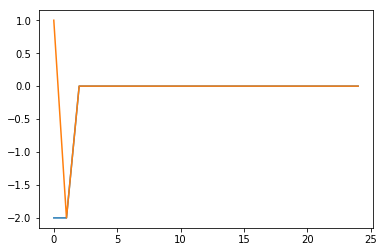

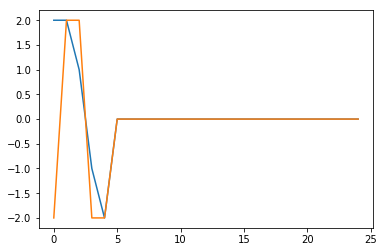

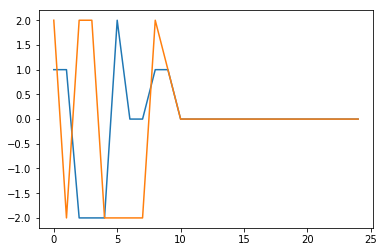

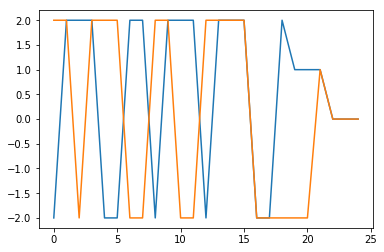

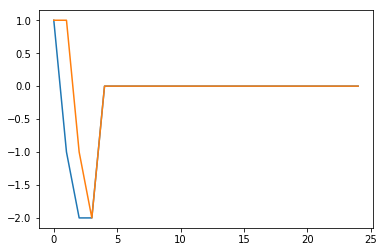

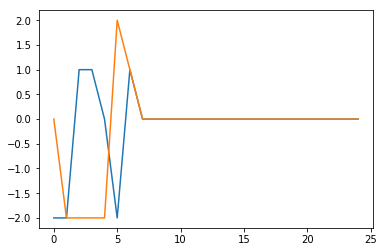

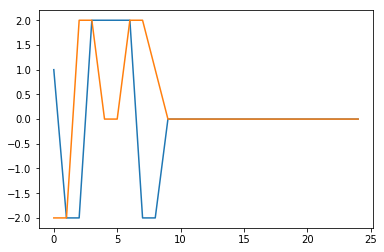

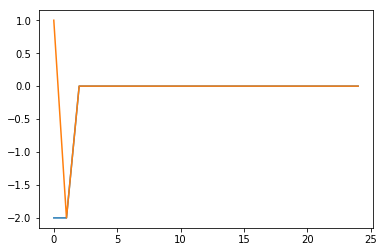

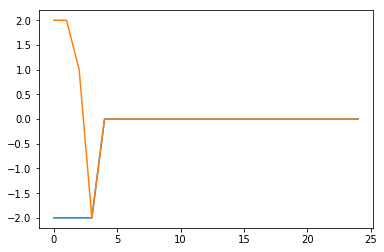

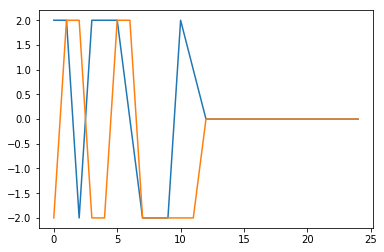

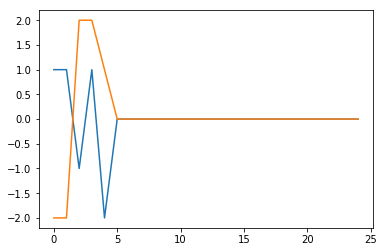

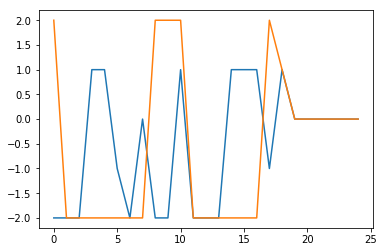

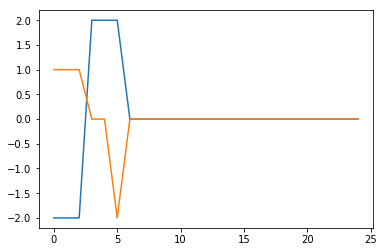

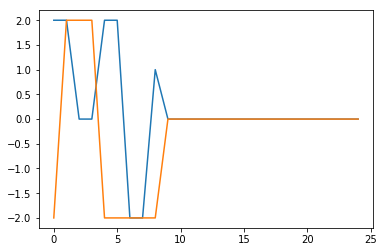

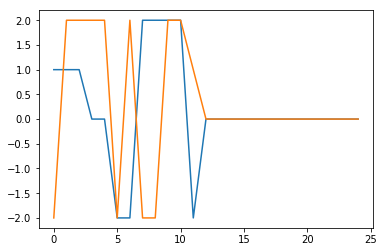

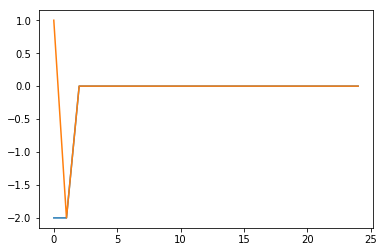

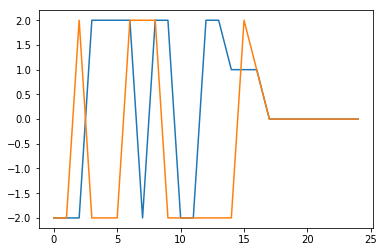

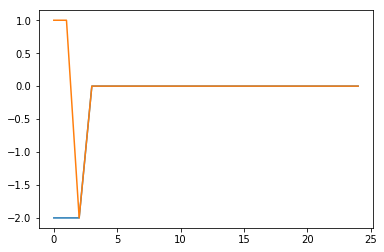

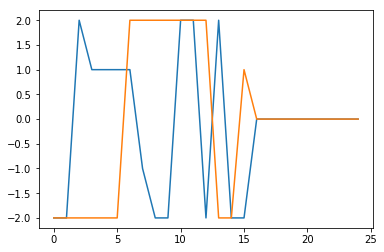

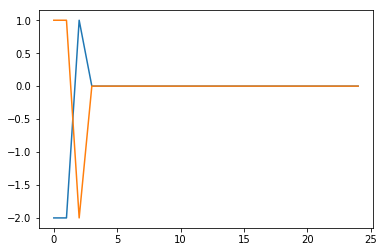

In [21]:
transform_data(data10,liste,0,1,35)

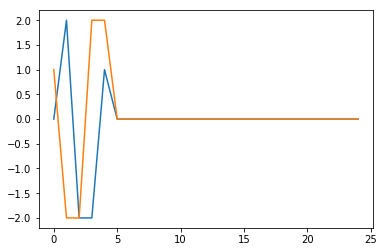

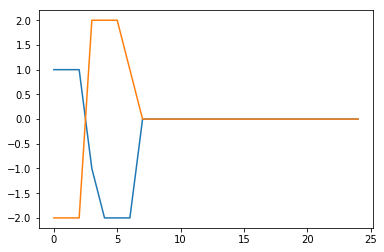

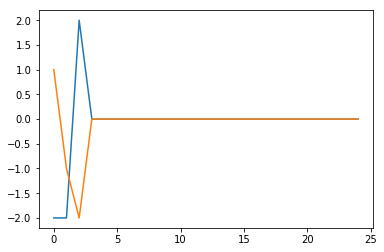

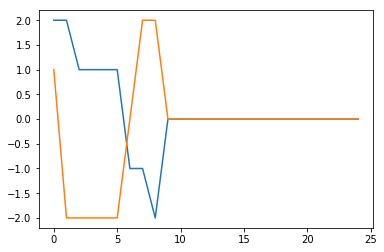

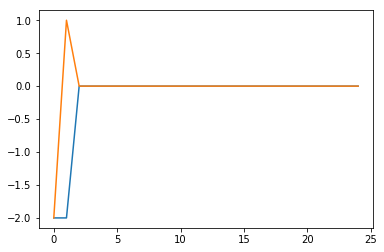

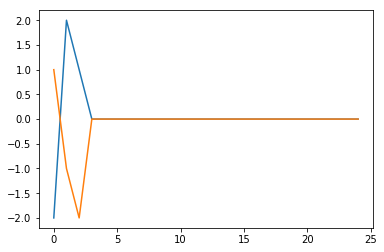

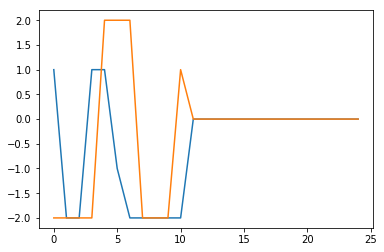

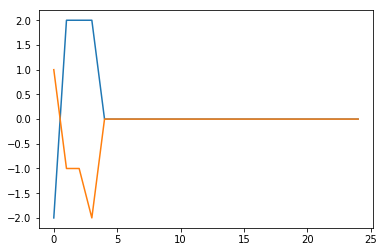

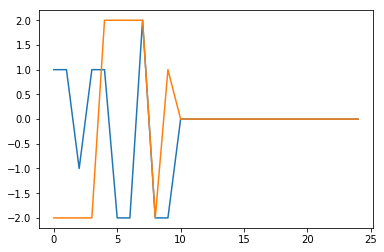

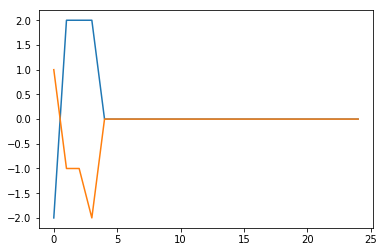

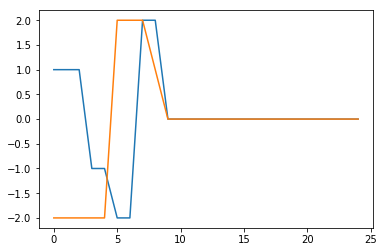

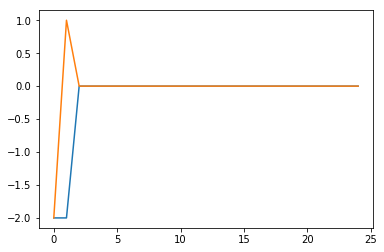

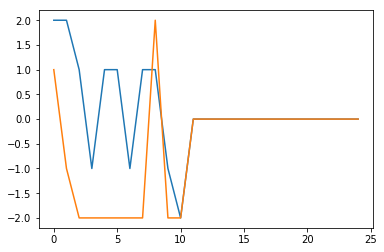

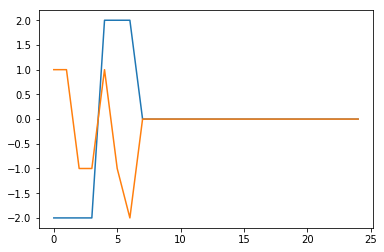

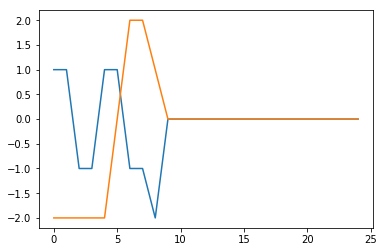

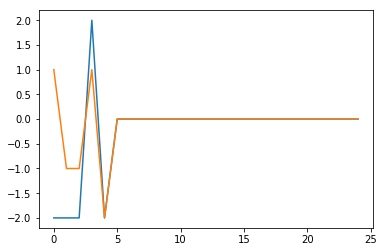

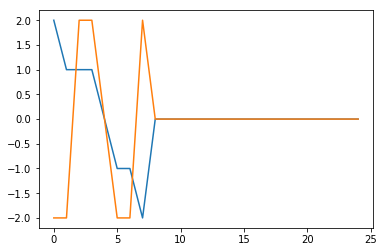

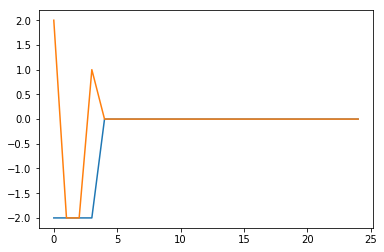

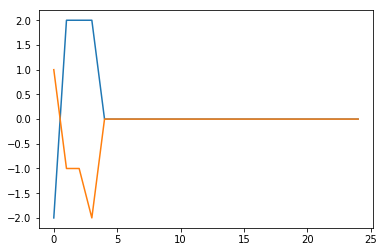

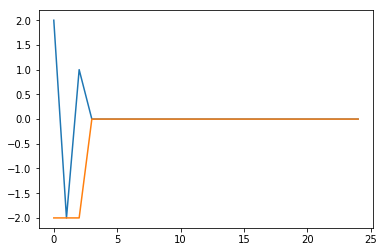

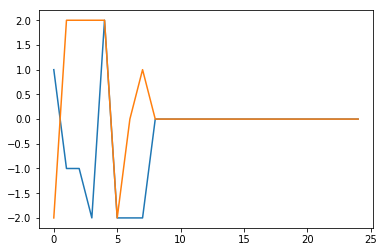

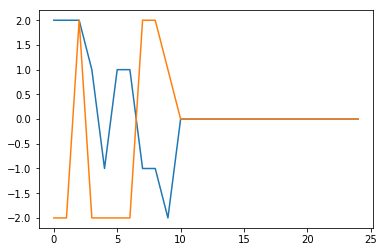

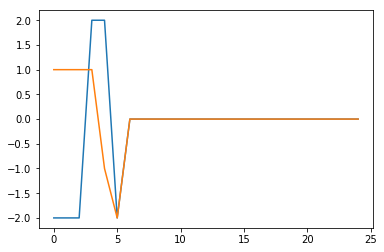

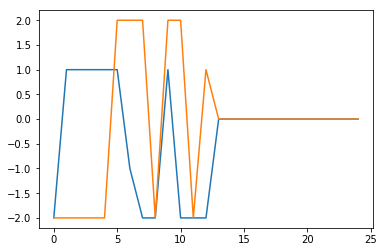

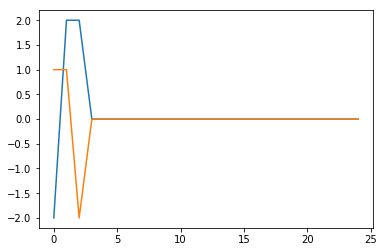

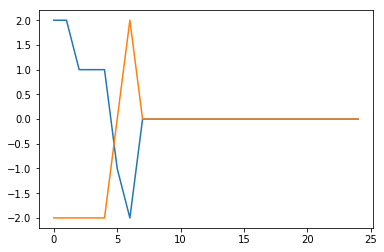

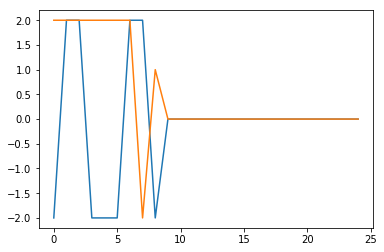

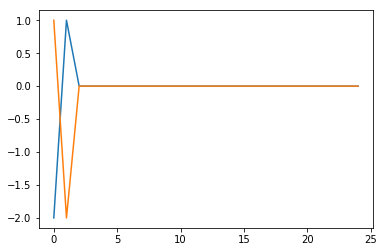

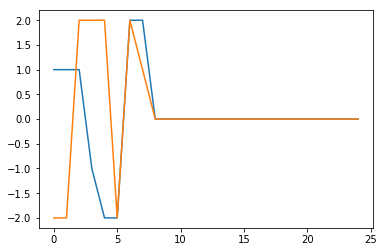

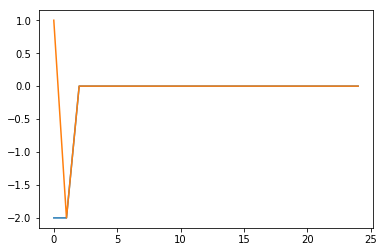

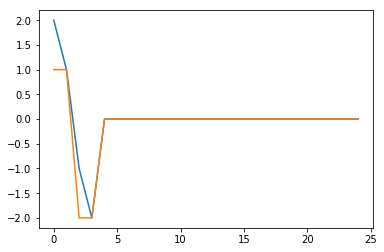

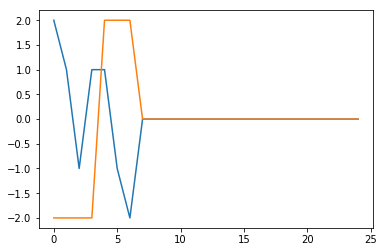

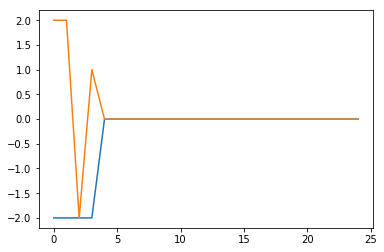

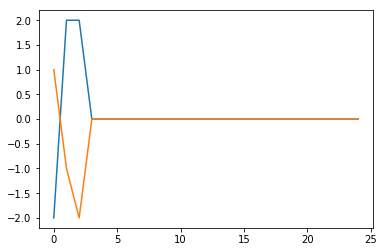

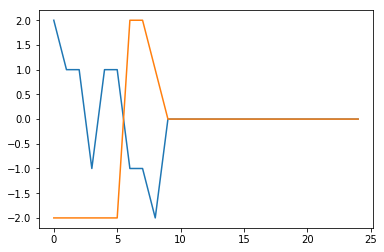

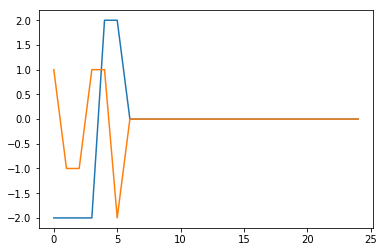

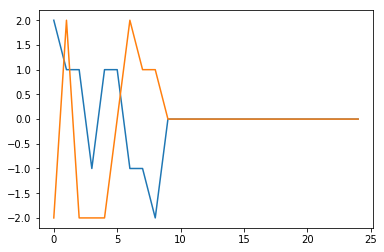

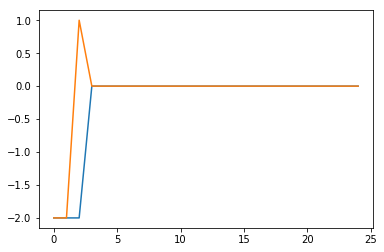

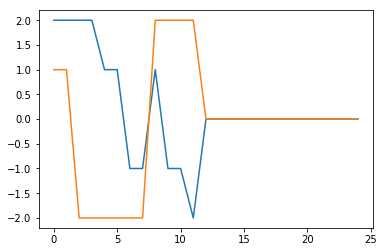

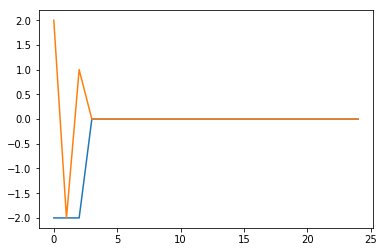

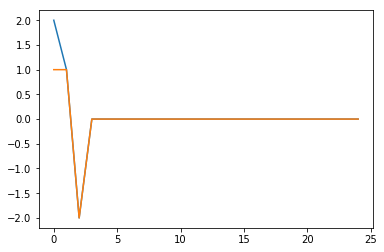

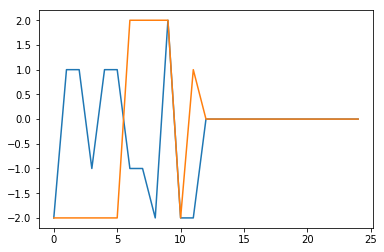

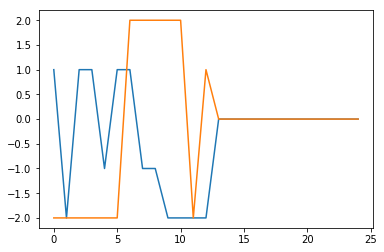

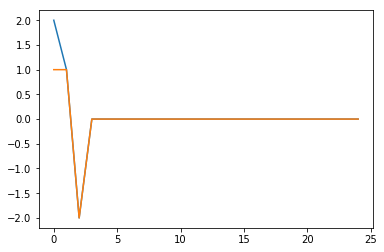

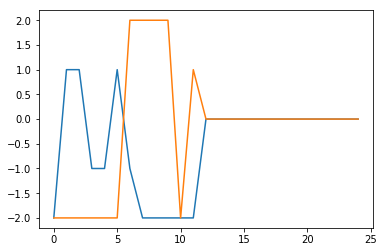

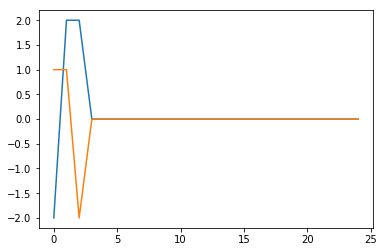

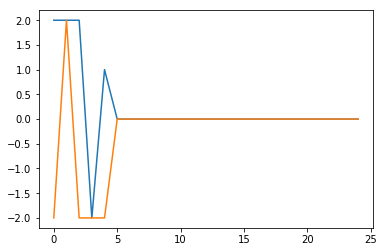

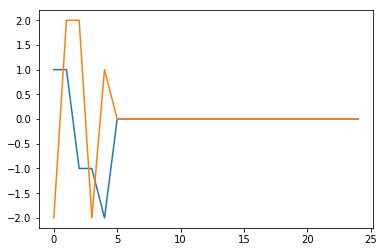

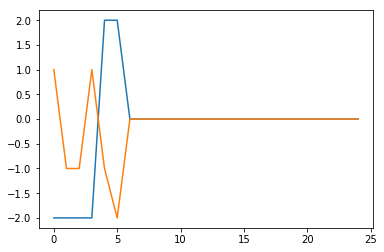

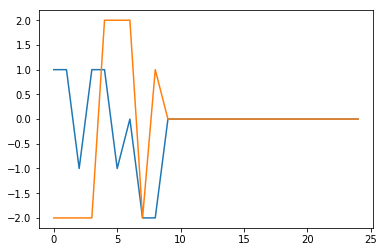

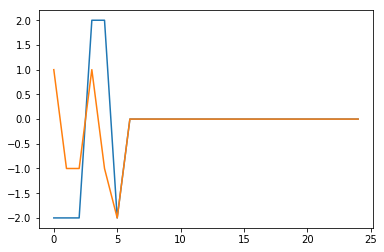

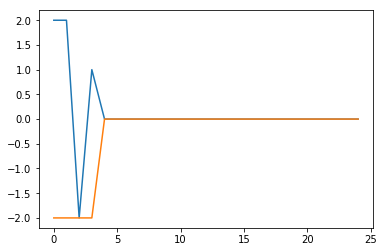

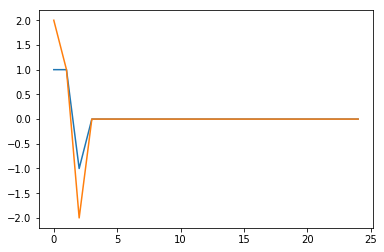

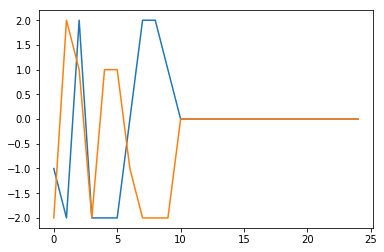

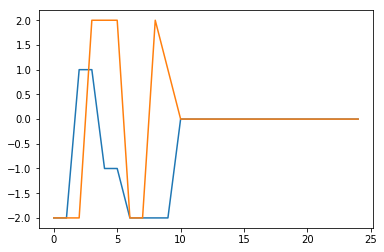

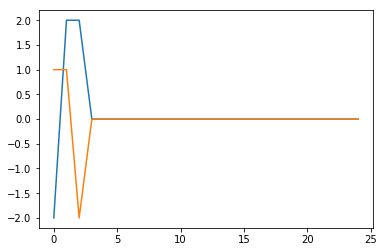

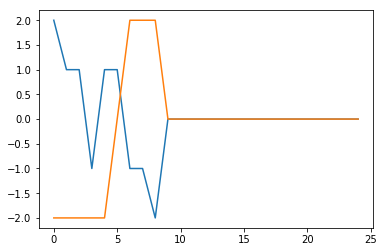

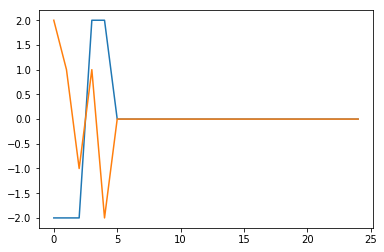

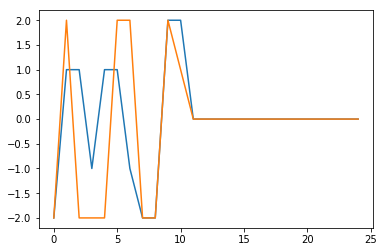

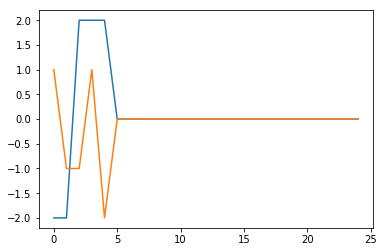

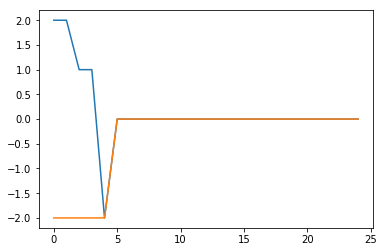

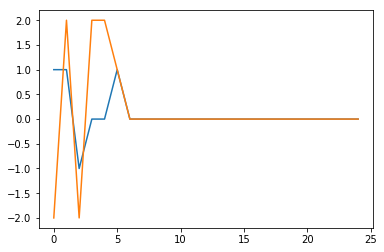

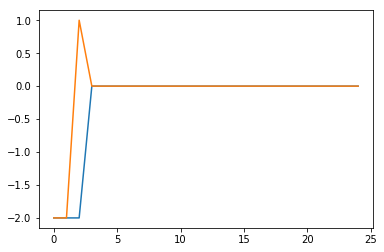

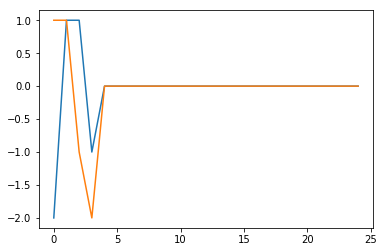

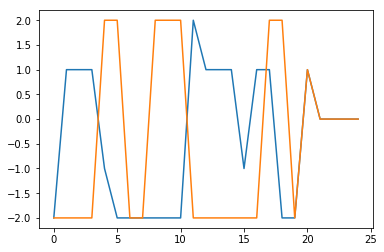

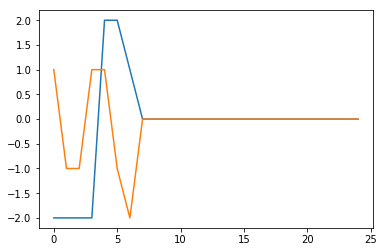

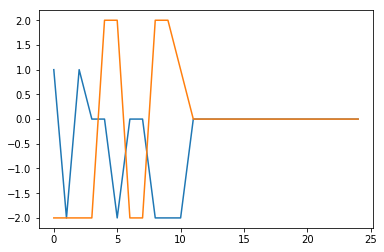

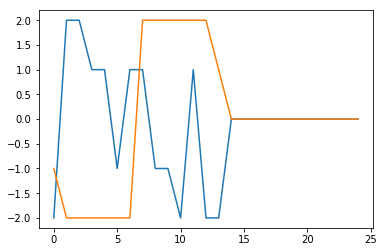

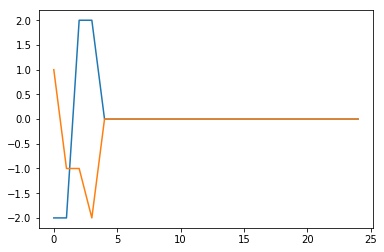

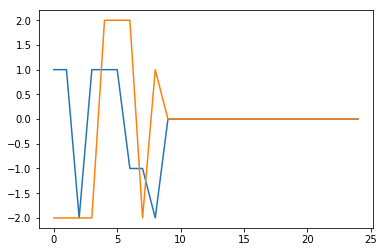

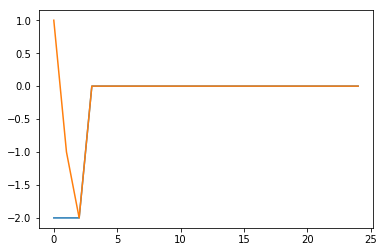

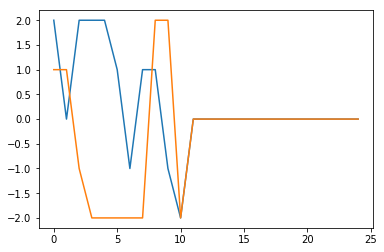

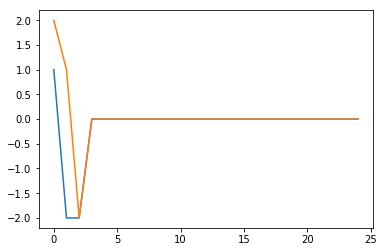

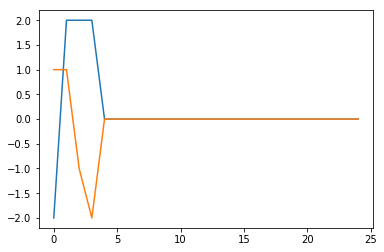

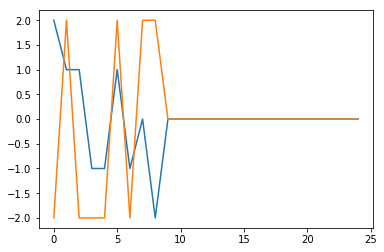

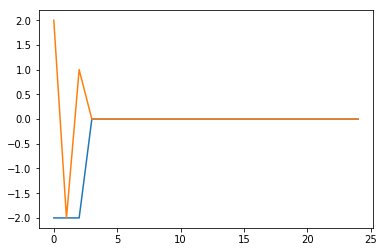

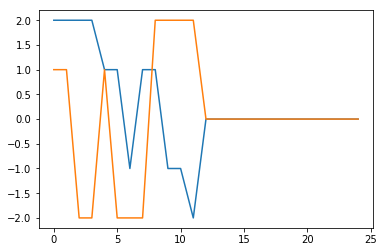

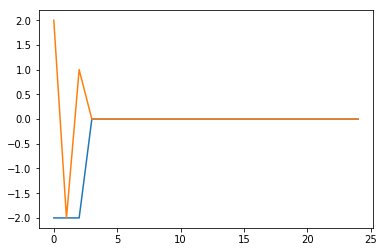

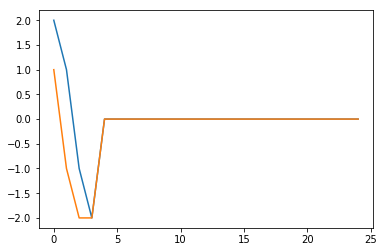

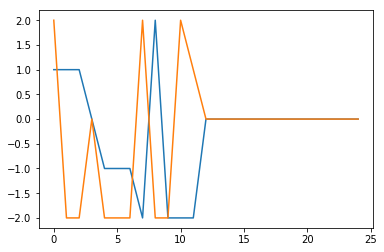

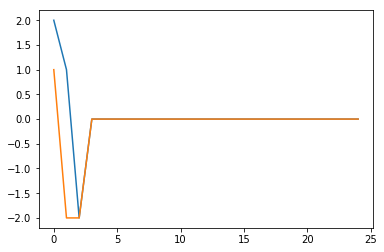

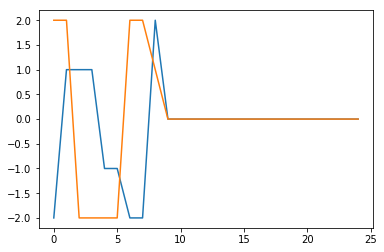

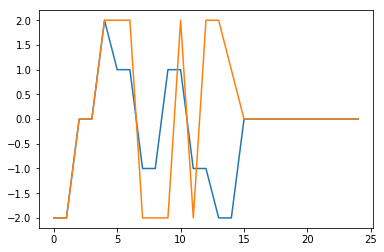

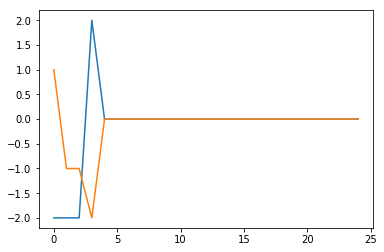

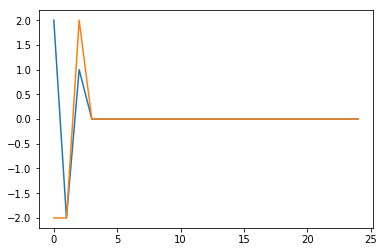

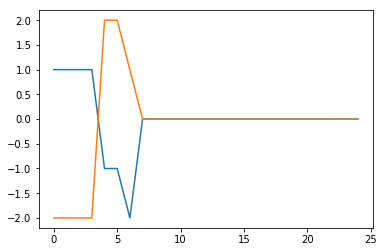

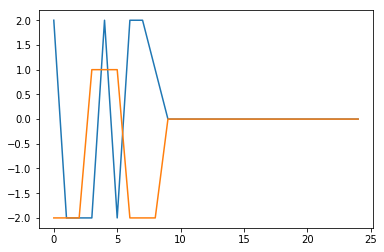

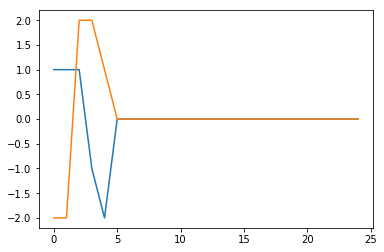

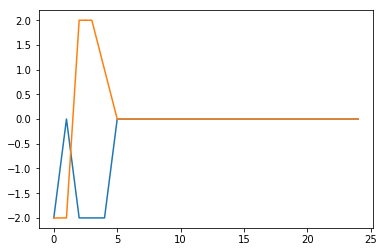

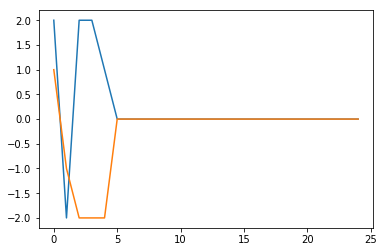

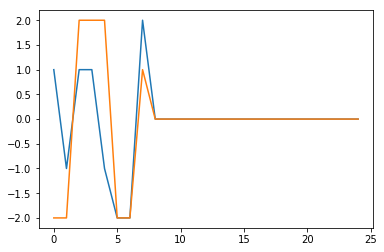

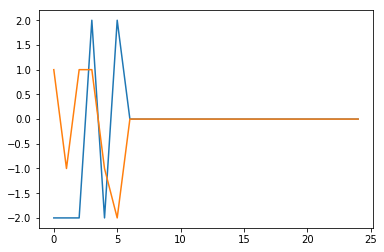

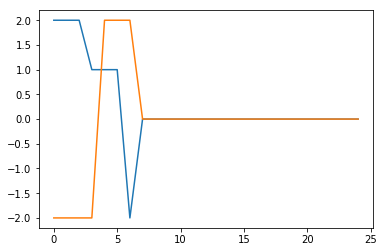

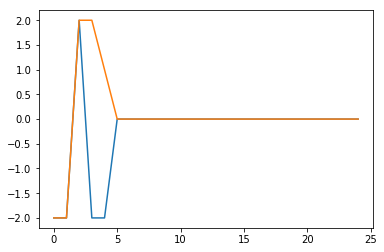

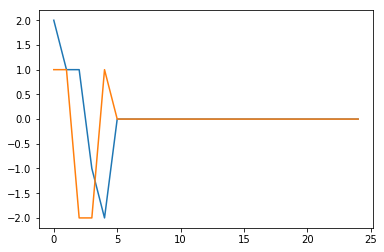

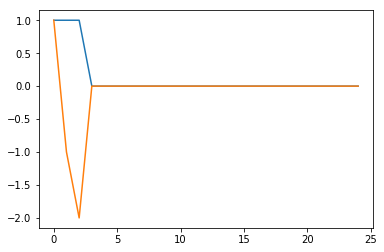

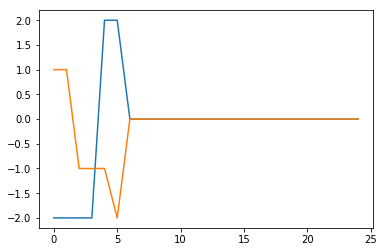

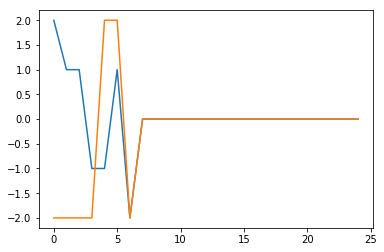

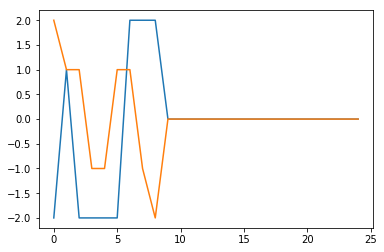

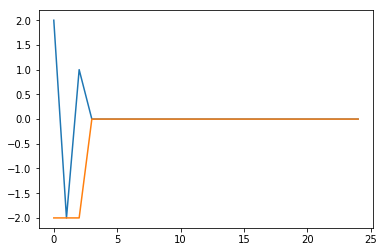

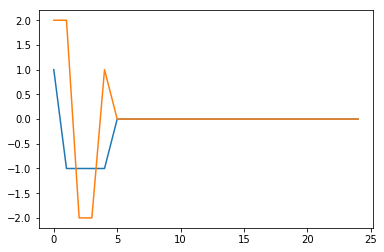

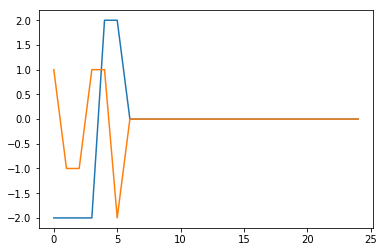

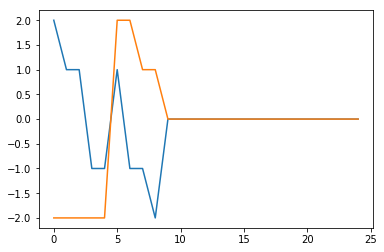

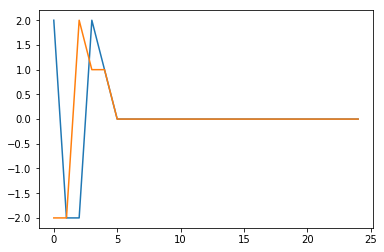

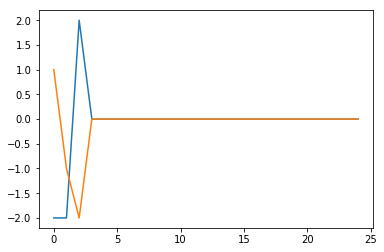

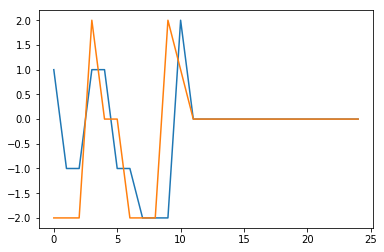

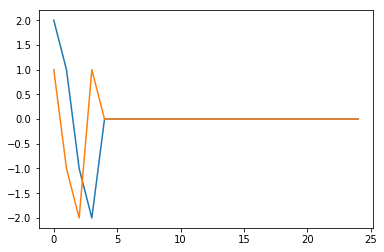

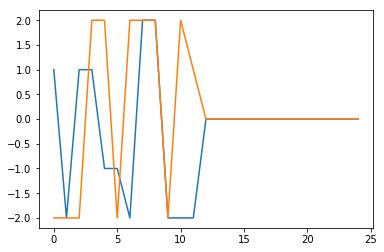

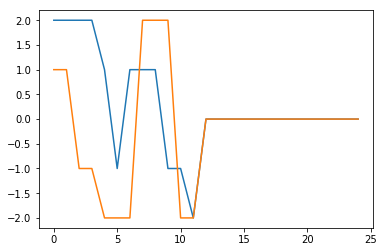

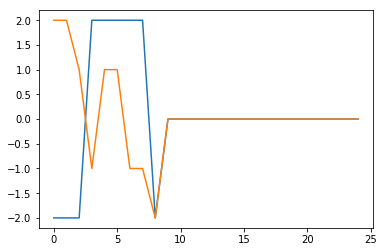

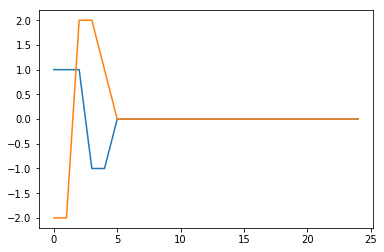

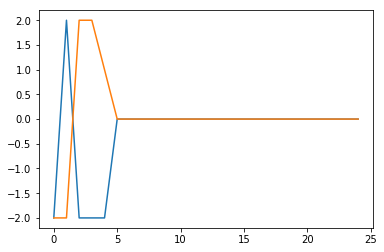

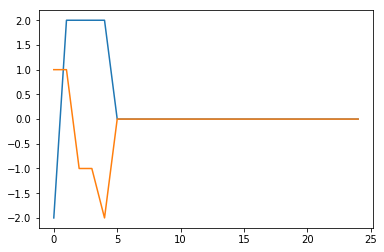

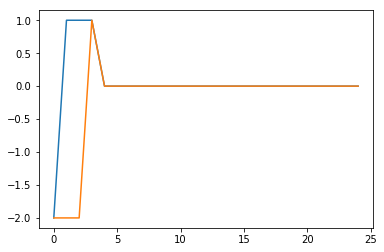

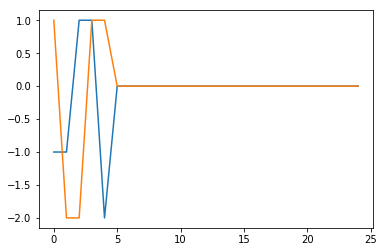

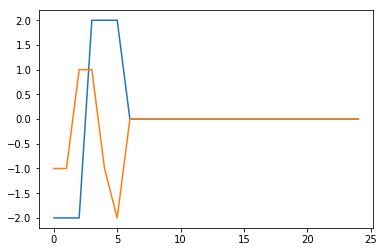

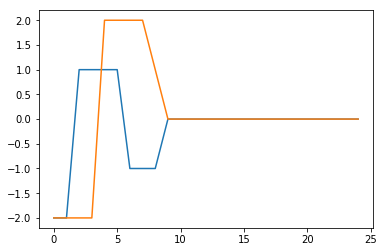

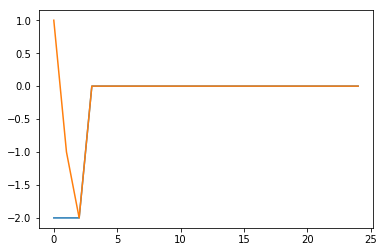

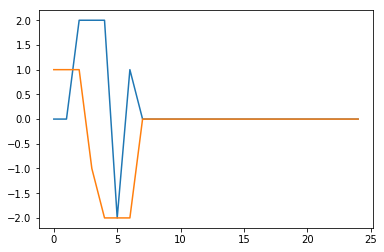

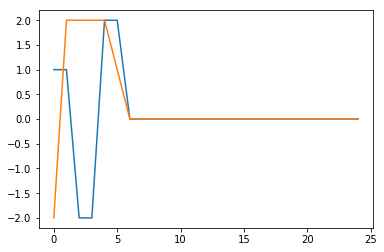

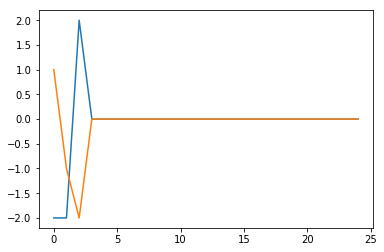

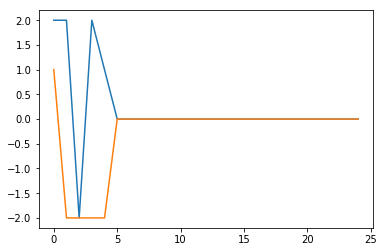

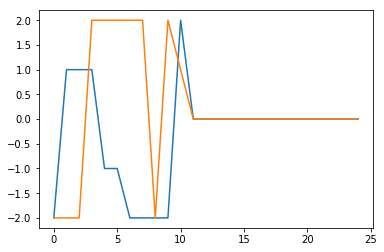

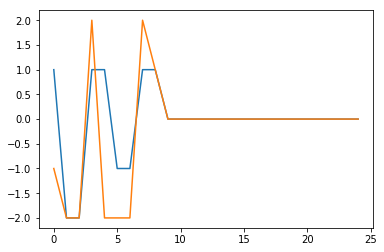

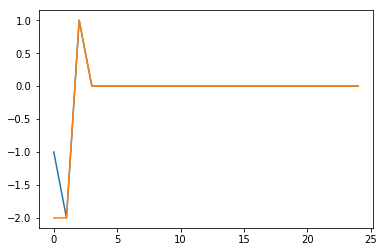

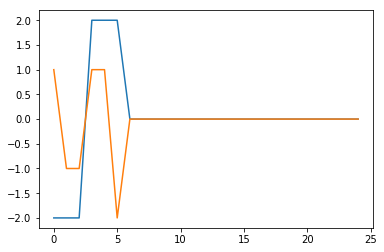

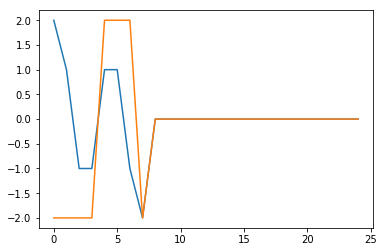

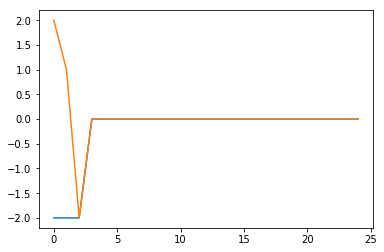

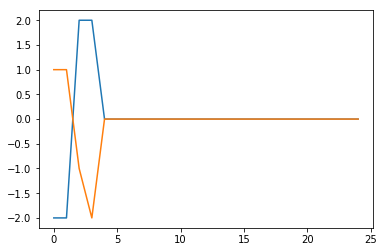

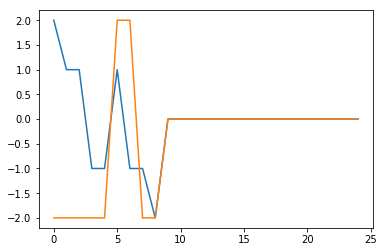

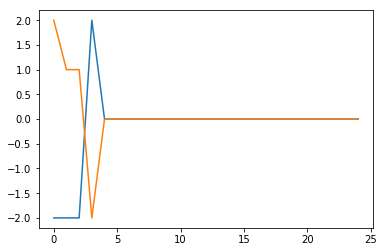

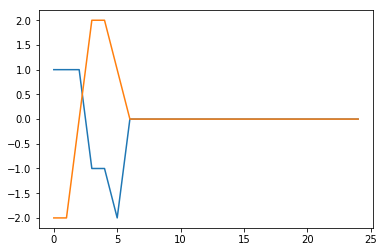

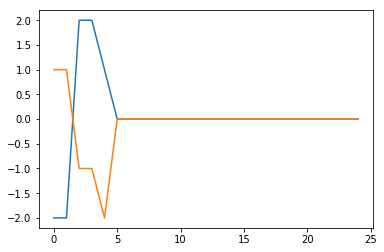

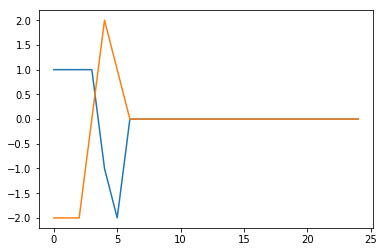

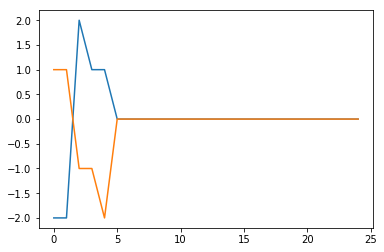

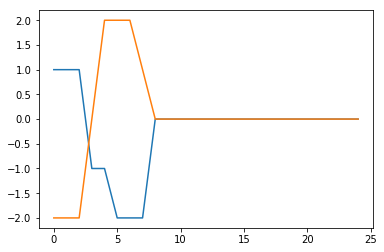

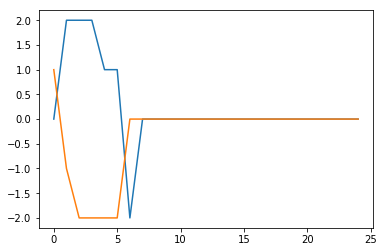

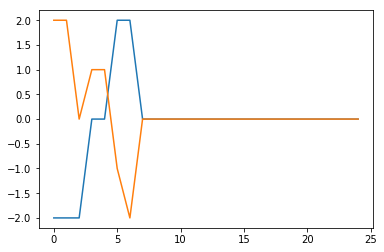

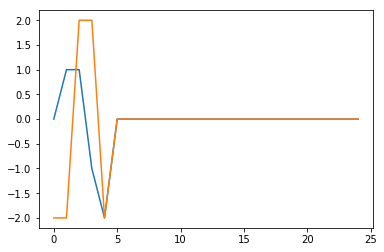

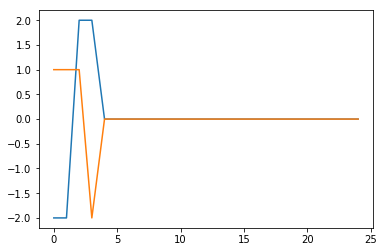

In [22]:
transform_data(data11,liste,0,1,35)

In [23]:
print(liste)

[array([-2, -2, -2, -2, -2, -2,  1,  1, -2, -2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -2, -2, -2, -2, -2, -2, -2,  2,  2,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  3], dtype=int32), array([-2, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2], dtype=int32), array([ 2, -2, -2, -2, -2, -2, -2, -2,  2,  2, -2, -2,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1, -2, -2, -2, -2, -2, -2, -2,  2,  2,  2,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2], dtype=int32

In [24]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

import numpy as np
import pandas as pd

In [25]:
data=np.array(liste)

In [26]:
print(data)

[[-2 -2 -2 ...  0  0  3]
 [-2 -2  0 ...  0  0  2]
 [ 2 -2 -2 ...  0  0  2]
 ...
 [ 2  2  2 ...  0  0  3]
 [-2 -2  0 ...  0  0  3]
 [-2 -2 -2 ...  0  0  3]]


In [27]:
features = data[:,:-1]
labels = data[:,-1:]
labels = labels.reshape((-1,)) # Juste pour rendre le print plus beau mais marche sans
print(features,labels)

[[-2 -2 -2 ...  0  0  0]
 [-2 -2  0 ...  0  0  0]
 [ 2 -2 -2 ...  0  0  0]
 ...
 [ 2  2  2 ...  0  0  0]
 [-2 -2  0 ...  0  0  0]
 [-2 -2 -2 ...  0  0  0]] [3 2 2 3 3 3 3 1 2 1 1 3 0 0 3 3 2 0 3 2 3 3 3 1 1 3 1 3 3 1 3 2 2 1 3 2 3
 3 0 1 2 2 3 1 0 0 0 1 3 0 3 3 0 1 2 0 1 0 3 3 3 1 2 3 0 3 1 1 3 3 0 2 2 1
 3 3 3 3 1 1 1 3 3 3 3 1 2 0 3 3 1 1 1 2 1 1 2 1 3 1 2 1 2 1 3 1 2 0 2 2 3
 0 3 2 1 2 1 3 2 3 0 3 3 1 3 1 1 3 2 3 3 2 0 1 3 2 2 2 1 2 2 1 2 1 1 1 1 2
 2 3 3 2 3 0 2 2 1 0 1 1 1 1 3 1 3 2 1 0 3 0 0 2 3 3 3 3 0 0 2 2 0 3 3 0 3
 1 3 3 2 1 3 3 1 3 2 2 3 3 3 3 3 0 3 3 2 2 3 3 1 1 1 1 3 2 3 1 3 3 3 3 1 3
 1 2 3 2 2 3 3 0 3 2 1 1 3 1 3 1 2 0 2 3 1 1 3 2 2 3 2 1 2 3 2 1 1 3 1 2 3
 3 3 3 0 2 2 1 3 2 3 3 2 1 2 0 3 2 2 3 3 2 2 3 0 0 2 2 2 1 2 1 2 0 3 3 3 3
 3 3 1 1 1 2 3 1 3 3 0 2 3 0 2 3 3 2 3 0 3 3 2 3 3 3 2 2 2 2 0 1 2 0 3 2 3
 1 1 3 3 2 2 2 1 3 0 1 3 3 1 2 0 3 1 2 2 3 3 1 3 2 1 3 1 3 3 2 3 3 0 0 2 1
 3 0 3 3 3 2 2 3 3 3 0 2 1 2 2 0 3 3 2 1 3 3 3 3]


In [28]:
def split_data(features, labels):
    i = int((features.shape[0]*7)/10)
    j = int((features.shape[0]*2)/10)
    k = int((features.shape[0])/10)
    features_train = features[:i,:]
    features_train = features_train.reshape((features_train.shape[0],features_train.shape[1],1))
    labels_train = labels[:i]
    features_test = features[i:i+j,:]
    features_test = features_test.reshape((features_test.shape[0],features_test.shape[1],1))
    labels_test = labels[i:i+j]
    features_valid = features[-k:,:]
    features_valid = features_valid.reshape((features_valid.shape[0],features_valid.shape[1],1))
    labels_valid = labels[-k:]
    
    return (features_train,labels_train),(features_test,labels_test),(features_valid,labels_valid)

In [29]:
train, test, valid = split_data(features, labels)
print(train,test,valid)

(array([[[-2],
        [-2],
        [-2],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[-2],
        [-2],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 2],
        [-2],
        [-2],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       ...,

       [[-2],
        [ 2],
        [ 2],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 1],
        [ 1],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[-2],
        [ 1],
        [ 1],
        ...,
        [ 0],
        [ 0],
        [ 0]]], dtype=int32), array([3, 2, 2, 3, 3, 3, 3, 1, 2, 1, 1, 3, 0, 0, 3, 3, 2, 0, 3, 2, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 3, 0, 1, 2, 2, 3, 1,
       0, 0, 0, 1, 3, 0, 3, 3, 0, 1, 2, 0, 1, 0, 3, 3, 3, 1, 2, 3, 0, 3,
       1, 1, 3, 3, 0, 2, 2, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 2, 0,
       3, 3, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 2, 2,
       3, 0, 

In [30]:
# Initialiser les Placeholders
x = tf.placeholder(tf.float32, shape=(None, 70,1))
y = tf.placeholder(tf.int64, shape=(None))
dropout_prob = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int64)

In [31]:
n_cell = 512
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([n_cell,4])),
             'biases':tf.Variable(tf.random_normal([4]))}

    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, 70])
    x = tf.split(x, 1, 0)

    lstm_cell = rnn_cell.MultiRNNCell([rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True),rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True),rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True),rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True),rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True)])
    #lstm_cell = rnn_cell.BasicLSTMCell(n_cell,state_is_tuple=True)
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output

In [32]:
logits = recurrent_neural_network(x)
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits, name=None)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope("Train"):
    learning_rate = 0.00000001 + tf.train.exponential_decay(0.0001,step,100,1/math.e)
    train_op = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Convert logits to label indexes
    prediction = tf.argmax(logits, 1)
    num_correct_prediction = tf.equal(prediction, y)
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, tf.float32))

 Epoch : 0  Loss:  1.5303888  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 1  Loss:  1.5300642  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 2  Loss:  1.5297432  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 3  Loss:  1.5294259  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 4  Loss:  1.5291119  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 5  Loss:  1.5288014  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 6  Loss:  1.5284942  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 7  Loss:  1.5281906  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 8  Loss:  1.5278901  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 9  Loss:  1.5275931  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 10  Loss:  1.5272994  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 11  Loss:  1.5270088  Accuracy:  0.23636363  Accuracy Test:  0.33333334
 Epoch : 12  Loss:  1.5267211  Accurac

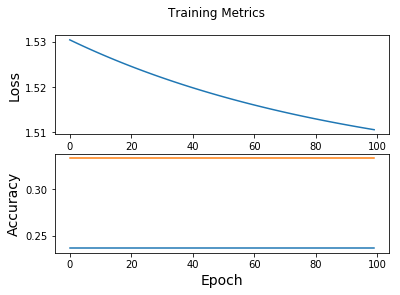

In [33]:
## Note: Rerunning this cell uses the same model variables
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Initilize the Session
sess = tf.Session()

# Initialize the model's variables
sess.run(tf.global_variables_initializer())

for i in range(100):
    ### Votre code
    loss_val, accuracy_val = sess.run([loss,accuracy], feed_dict={x: train[0], y: train[1]})
    sess.run(train_op, feed_dict={x: train[0], y: train[1], step: i})
     ### Votre Code
    # On récupère le taux de prédiction sur les données test
    test_accuracy_val = sess.run([accuracy], feed_dict={x: test[0], y: test[1]})[0]

    print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val," Accuracy Test: ",test_accuracy_val)

    train_loss_results.append(loss_val)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)
            
# Plot the evolution of loss and train accuracy
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()

In [34]:
predictions = sess.run([prediction], feed_dict={x: valid[0]})[0]### Votre Code
print (predictions)
print(valid[1])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 3 2 1 3 1 3 3 2 3 3 0 0 2 1 3 0 3 3 3 2 2 3 3 3 0 2 1 2 2 0 3 3 2 1 3 3
 3 3]
